


# Análisis de mercado inmobiliario
### jdrincone@gmail.com

<a id="s-0"></a>
## Contenido primera parte

   - [Presentación](#s-10)
   - [Exploración](#s-11)
    - [Variables categóricas](#s-112)
    - [Variables númericas continuas](#s-113)  
    - [Variables númericas discretas](#s-114) 
    - [Correlación](#s-1ad)
     
   - [Desafio](#s-12)
    
   - [Machine Learning](#s-13)
    
     - [Preparación datos](#s-131)
      - [Benchmark](#s-132)
      - [Regresión por knn casos partículares](#s-133)
      - [Regresión por por tree casos particulares](#s-134)
      - [Función de Modelos casos generales](#s-135) 
      - [Transformación de variables y mejoramiento de los modelos de regresión](#s-14)
        - [Benchmark Transformado](#s-141)
        - [Knn Transformado](#s-142)
        - [Tree Transformado](#s-143)
             
   - [Conclusiones](#s-15)          
 

<a id="s-10"></a>
El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde las siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Para resolver este problema, en primera aproximación necesitaremos tres tipos de datos:
* Datos de ubicación: Información que nos diga donde se encuentra la propiedad
Esta variable nos ubica espacialmente, permitiendonos obtener No información propia de la casa, sino de sus alrededores (propiedad cercana a ), lo cual es importante a la hora de dar el precio de una propiedad.

* Datos de tipo de propiedad: Variable que nos hable sobre la variedad de tipo de propiedad
La propiedad puede ser de varios tipos, y según el tipo, el valor del inmueble puede variar.
* Datos de tamaño: Variable que nos parametrice las el precio de una propiedad según su dimensión.
El tamaño de la propiedad puede ser paramétrizado a partir del número de habitaciones, jardines en el inmueble
* Lugar donde se realiza la publicidad. 
Dependiendo del lugar donde se publique información del inmueble, esta va destida a cierto publico, es decir tiene cierto valor caracteristico.

<a id="s-11"></a>
# Análisis Exploratorio de Datos
[Regresar al inicio](#s-0)


En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [539]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import plotly.graph_objs as go 
import plotly.express as px
# formato retina mejora la calidad de las imagenes
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
print(f'Este dataset contiene {data.shape[1]} columnas de información de {data.shape[0]} propiedades')

Este dataset contiene 19 columnas de información de 146660 propiedades


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [3]:
print(f'Estos son los nombres de las {data.shape[1]} columnas que posee este dataset:\n \n {data.columns.values}')

Estos son los nombres de las 19 columnas que posee este dataset:
 
 ['start_date' 'end_date' 'created_on' 'lat' 'lon' 'l1' 'l2' 'l3' 'rooms'
 'bedrooms' 'bathrooms' 'surface_total' 'surface_covered' 'price'
 'currency' 'title' 'description' 'property_type' 'operation_type']


In [4]:
null_values_count = data.isnull().sum()
print(f'Columnas con valores faltantes \n \n{null_values_count.sort_values(ascending=False)[:5]}')

Columnas con valores faltantes 
 
surface_covered    21614
surface_total      20527
lon                 9959
lat                 9925
bathrooms           5957
dtype: int64


<a id="s-112"></a>
3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [5]:
longitud = len(data["property_type"].value_counts())
print(f"En total hay {longitud} tipos de propiedad publicadas según el dataset. Cada propiedad posee esta cantidad de instancias:")
data["property_type"].value_counts()

En total hay 10 tipos de propiedad publicadas según el dataset. Cada propiedad posee esta cantidad de instancias:


Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

Gráfico de barras donde se puede visualizar este conteo:

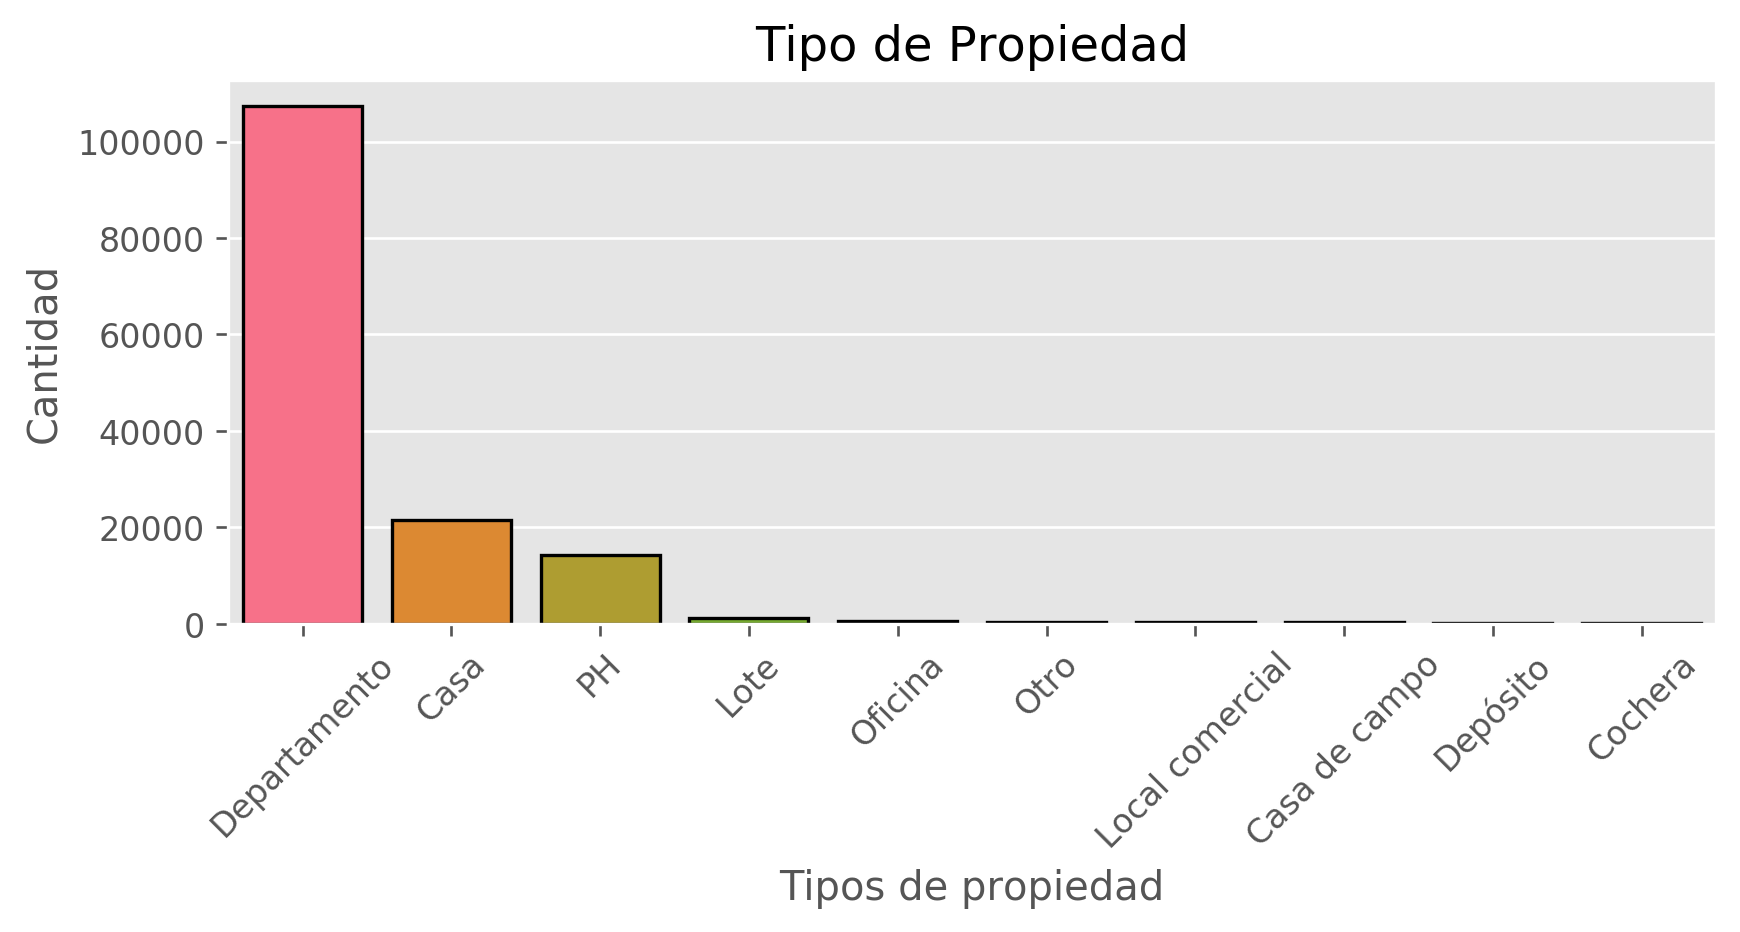

In [6]:
plt.figure(dpi=120,figsize=(8,3))
ax = sns.countplot(data = data, x = 'property_type',
                   order = data['property_type'].value_counts().index,saturation=1,linewidth=1,edgecolor=(0,0,0),palette="husl");
ax.set_title("Tipo de Propiedad")
ax.set_ylabel("Cantidad")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_xlabel("Tipos de propiedad");

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [7]:
print(f'Cantidad de propiedades por provincia:\n \n{data["l2"].value_counts()}')

Cantidad de propiedades por provincia:
 
Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64


In [8]:
n=5
df_capital = data[data.l2=='Capital Federal']
print(f'Número de propiedades para los {n} barrios con más propiedades de Capital Federal: \n')
print( df_capital['l3'].value_counts()[:n])

Número de propiedades para los 5 barrios con más propiedades de Capital Federal: 

Palermo         13073
Almagro          7527
Belgrano         6935
Caballito        6650
Villa Crespo     6494
Name: l3, dtype: int64


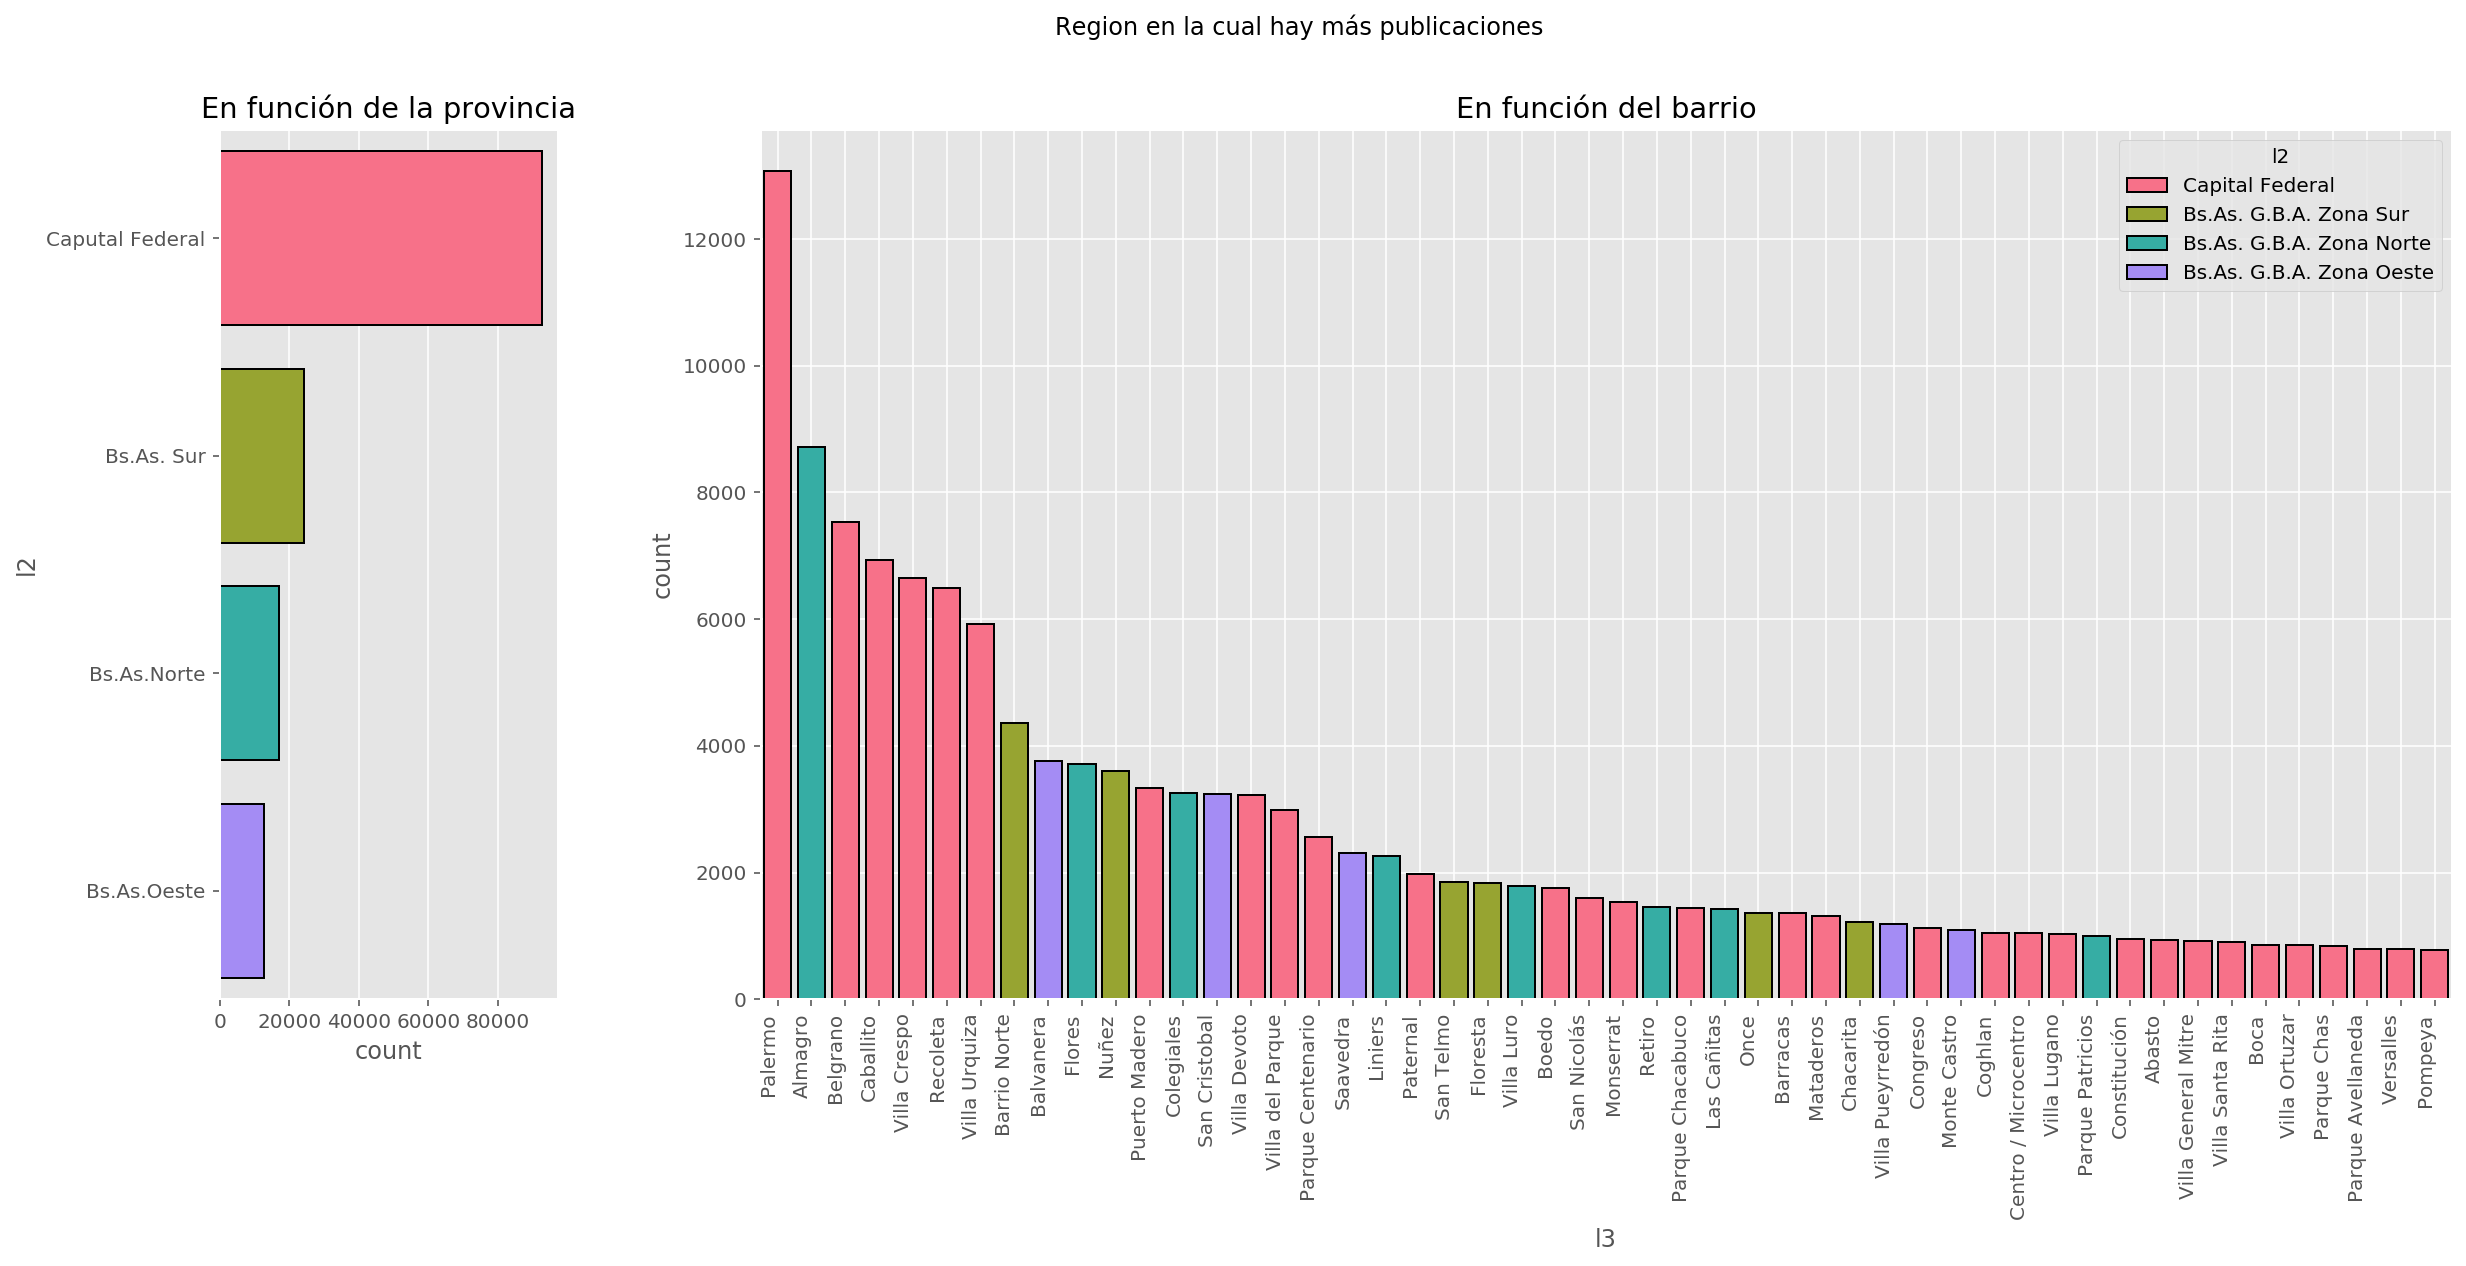

In [9]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

fig = plt.figure(figsize=(20,8))
spec = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[1, 5])

ax0 = fig.add_subplot(spec[0])
fig.suptitle('Region en la cual hay más publicaciones');
sns.countplot(data = data, y = 'l2',dodge=False,order = data['l2'].value_counts().index,palette="husl",saturation=1,linewidth=1,edgecolor=(0,0,0),ax=ax0);
ax0.set_title('En función de la provincia')
ax0.set_yticklabels(['Caputal Federal','Bs.As. Sur','Bs.As.Norte','Bs.As.Oeste'], ha='right')
ax1 = fig.add_subplot(spec[1])
sns.countplot(data = data, x = 'l3',hue ='l2', dodge=False,order = data['l3'].value_counts()[:50].index,palette="husl",saturation=1,linewidth=1,edgecolor=(0,0,0),ax =ax1);
xlabels = pd.Series(df_capital['l3'].value_counts()[:50]).index
ax1.set_title('En función del barrio')
ax1.set_xticklabels(xlabels, rotation=90, ha='right')
plt.grid(True)
plt.show()

El anterior grafico resume el número de publicaciones de ventas para cada provincia y el número de publicaciones de forma decreciente para barrios de cada provincia. Como encontramos antes, los primeros barrios donde hay más publicaciones e ventas pertenecen a Capital Federal, alguno que sobresale es que el segundo barrio con mayor cantidad de publicaciones pertenece a la zona Norte.

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [10]:
df1 = data[((data["property_type"]=='Departamento') | (data["property_type"]=='Casa') |
                     (data["property_type"]=='PH')) & (data["l2"]=='Capital Federal')]
print(f'Verificamos tamaño del dataset con el filtro descrito: {df1.shape[0]} instancias, {df1.shape[1]} columnas ')# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO

Verificamos tamaño del dataset con el filtro descrito: 91485 instancias, 19 columnas 


<a id="s-113"></a>
**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [11]:
# A continuacion nos quedaremos con el dataset con el anterior filtro que hicimos y adicional solo nos quedaremos con las
#siguientes columnas
df = df1.copy()
col = ['l2','l3','property_type','rooms','bedrooms','bathrooms','surface_total','surface_covered', 'price']
df = df[col]

In [12]:
df.describe()

rooms      bedrooms     bathrooms  surface_total  \
count  91485.000000  91485.000000  89314.000000   82568.000000   
mean       2.964278      1.960278      1.560147     112.626369   
std        1.314704      1.072946      0.860309     980.713664   
min        1.000000      0.000000      1.000000      10.000000   
25%        2.000000      1.000000      1.000000      49.000000   
50%        3.000000      2.000000      1.000000      71.000000   
75%        4.000000      3.000000      2.000000     111.000000   
max       26.000000     15.000000     14.000000  126062.000000   

       surface_covered         price  
count     82250.000000  9.148500e+04  
mean         94.966310  2.595003e+05  
std         778.515243  3.222654e+05  
min           1.000000  6.000000e+03  
25%          44.000000  1.200000e+05  
50%          63.000000  1.750000e+05  
75%          96.000000  2.790000e+05  
max      126062.000000  3.243423e+07

De esta tabla de descripción general analizaremos las ultimas tres columnas las cuales son variables continuas.
* *Superficie Total*:
Vemos que el valor máximo de esta columna es 3 ordenes de magnitud superior al valor medio, lo cual aunque posible debemos verificar a que se debe este comportamiento tan asimétrico.
* *Superficie Cubierta*:
Vemos que el valor mínimo de esta columna es 1m^2 lo cual es absurdo para el tipo de propiedad: Departamento,Casa,PH o Casa de campo.
* *Precio*:
Vemos que tenemos rango amplio en el que se manejan los precios donde el 75% de los datos se acomodan en el rango del orden de 10^3 y 10^5 dolares, mientras solo un 25% de los datos estan por encima del orden de los 10^7 dolares.


## A continuación veremos la distribución de las variables continuas en función de cada tipo de propiedad a partir de un diagrama de caja

In [13]:
#filtro superficie cubierta <= superficie total 
df = df[df['surface_covered']<=df['surface_total']]
#  de 10m^2 , por tanto aplicaremos este filtro
df = df[df['surface_covered']>=10]

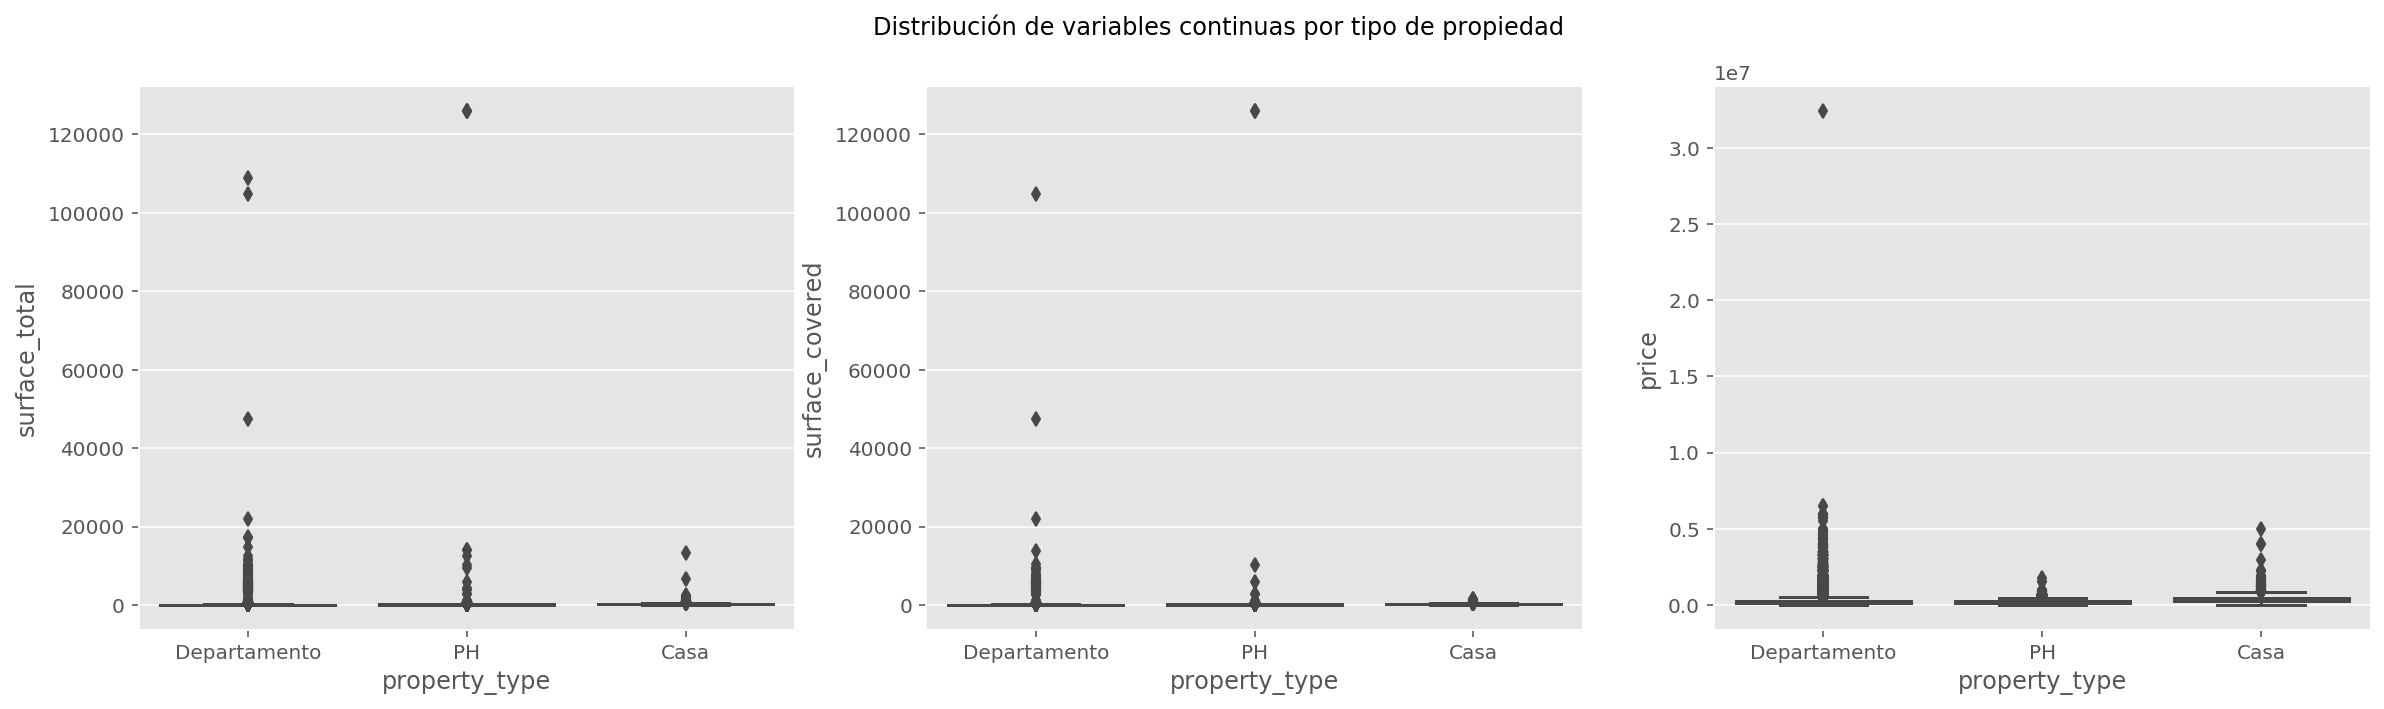

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(20,5));
fig.suptitle('Distribución de variables continuas por tipo de propiedad');
sns.boxplot( x=df['property_type'], y=df['surface_total'], ax = axes[0]);
sns.boxplot( x=df['property_type'], y=df['surface_covered'], ax = axes[1]);
sns.boxplot( x=df['property_type'], y=df['price'], ax = axes[2]);

Vemos que la propiedad que tiene el mayor valor en **surface_total** es una propiedad tipo PH en el barrio Caballito de Capital Federal, este valor de superficie total de 126062 $m^2$, lo cual representa el 1.7% de la superficie del barrio caballito [Wikipedia](https://es.wikipedia.org/wiki/Caballito), por tanto, lo asumimos como un dato errado y por el momento no tenemos herramientas ni información adicional del dataset par intentar solucionarlo, así que será eliminado.

Podemos continuar mirando datos partículares e inferir información sobre ellos para dar una limpieza de los outliers del dataset pero sería una labor poco eficiente, por tanto usaremos un criterio estadístico para eliminar datos que no encajan en las variedables continuas que estamos analizando.

Existen varios criterios para desarrollar esta tarea. Nosotros usaremos el criterio de las 3$\sigma$ para distribuciones que se aproximan a las Gaussianas. Aunque las distribuciones del dataset no son Gaussianas, debio que existe asimétricas en sus colas información que veremos a continuación con el parámetro de kurtosis.

Para saber si los datos están repartidos de forma simétrica o asimétrica, podemos usar varios coeficientes: Pearson, Fisher, Bowley-Yule, pero para una mirada rápida del comportamiento de las distribuciones, usaremos **skew** de SciPy que cuantifica la asimétria: si los valores que devuelve la función son cercanos a 0, la variable es simétrica. Si es positiva tiene cola a la derecha y si es negativa tiene cola a la izquierda.

In [15]:
import scipy.stats as ss
if ss.skew(df.surface_total)>0:
    print('La distribución de superficie total tiene cola a la derecha')
else:
    print('La distribución de superficie total a la izquierda')
if ss.skew(df.surface_covered)>0:
    print('La distribución de superficie cubierta tiene cola a la derecha')
else:
    print('La distribución de superficie cubierta a la izquierda')
if ss.skew(df.price)>0:
    print('La distribución de precios tiene cola a la derecha')
else:
    print('La distribución de precios cubierta a la izquierda')

La distribución de superficie total tiene cola a la derecha
La distribución de superficie cubierta tiene cola a la derecha
La distribución de precios tiene cola a la derecha


## Criterio de las 3$\sigma$

Como calculamos antes, las distribuciones tienes colas alargadas hacia la derecha, por tanto miremos que tan larga es esta cola en unidades de $\sigma$:

In [16]:
st= (df.surface_total.max()-df.surface_total.mean())/df.surface_total.std()
sc=(df.surface_covered.max()-df.surface_covered.mean())/df.surface_covered.std()
sp=(df.price.max()-df.price.mean())/df.price.std()
print(f'En la distribución de superficie total, su valor máximo esta a: {int(st)} sigmas de su valor medio' )
print(f'En la distribución de superficie cubierta, su valor máximo esta a: {int(sc)} sigmas de su valor medio' )
print(f'En la distribución de precios, su valor máximo esta a: {int(sp)} sigmas de su valor medio' )

En la distribución de superficie total, su valor máximo esta a: 127 sigmas de su valor medio
En la distribución de superficie cubierta, su valor máximo esta a: 163 sigmas de su valor medio
En la distribución de precios, su valor máximo esta a: 96 sigmas de su valor medio


Como se puede observar, el dato mayor de cada distribución está alejado del valor medio de la distribución en un orden de aproximadamente 100 unidades de sigmas. Nosotros nos quedaremos solo con 3$\sigma$, ya que este criterio nos asegura que para una distribución normal, se conservaría el 99.7% de la información. Para nuestro caso particular, al ver que no es una distribución Gaussiana, este porcentaje será menor, pero observaremos que se siguen conservando la mayoría de los datos.

In [17]:
cut_total =df.surface_total.mean()+3*df.surface_total.std()
cut_cubierta =df.surface_covered.mean()+3*df.surface_covered.std()
cut_price = df.price.mean()+3*df.price.std()

In [18]:
df5 =df[(df.price<=cut_price) & (df.surface_covered<=cut_cubierta) & (df.surface_total<=cut_total)]

In [19]:
print("Porcentaje de datos conservados:")
print(f"{np.round((df5.shape[0]/df.shape[0])*100, 2)}%")

Porcentaje de datos conservados:
98.03%


Como se observa, con el criterio de las 3$\sigma$, aún para nuestro caso, se conserva un alto porcentaje de los datos.

Ahora miremos el nuevo boxplot con los datos depurados con este criterio:

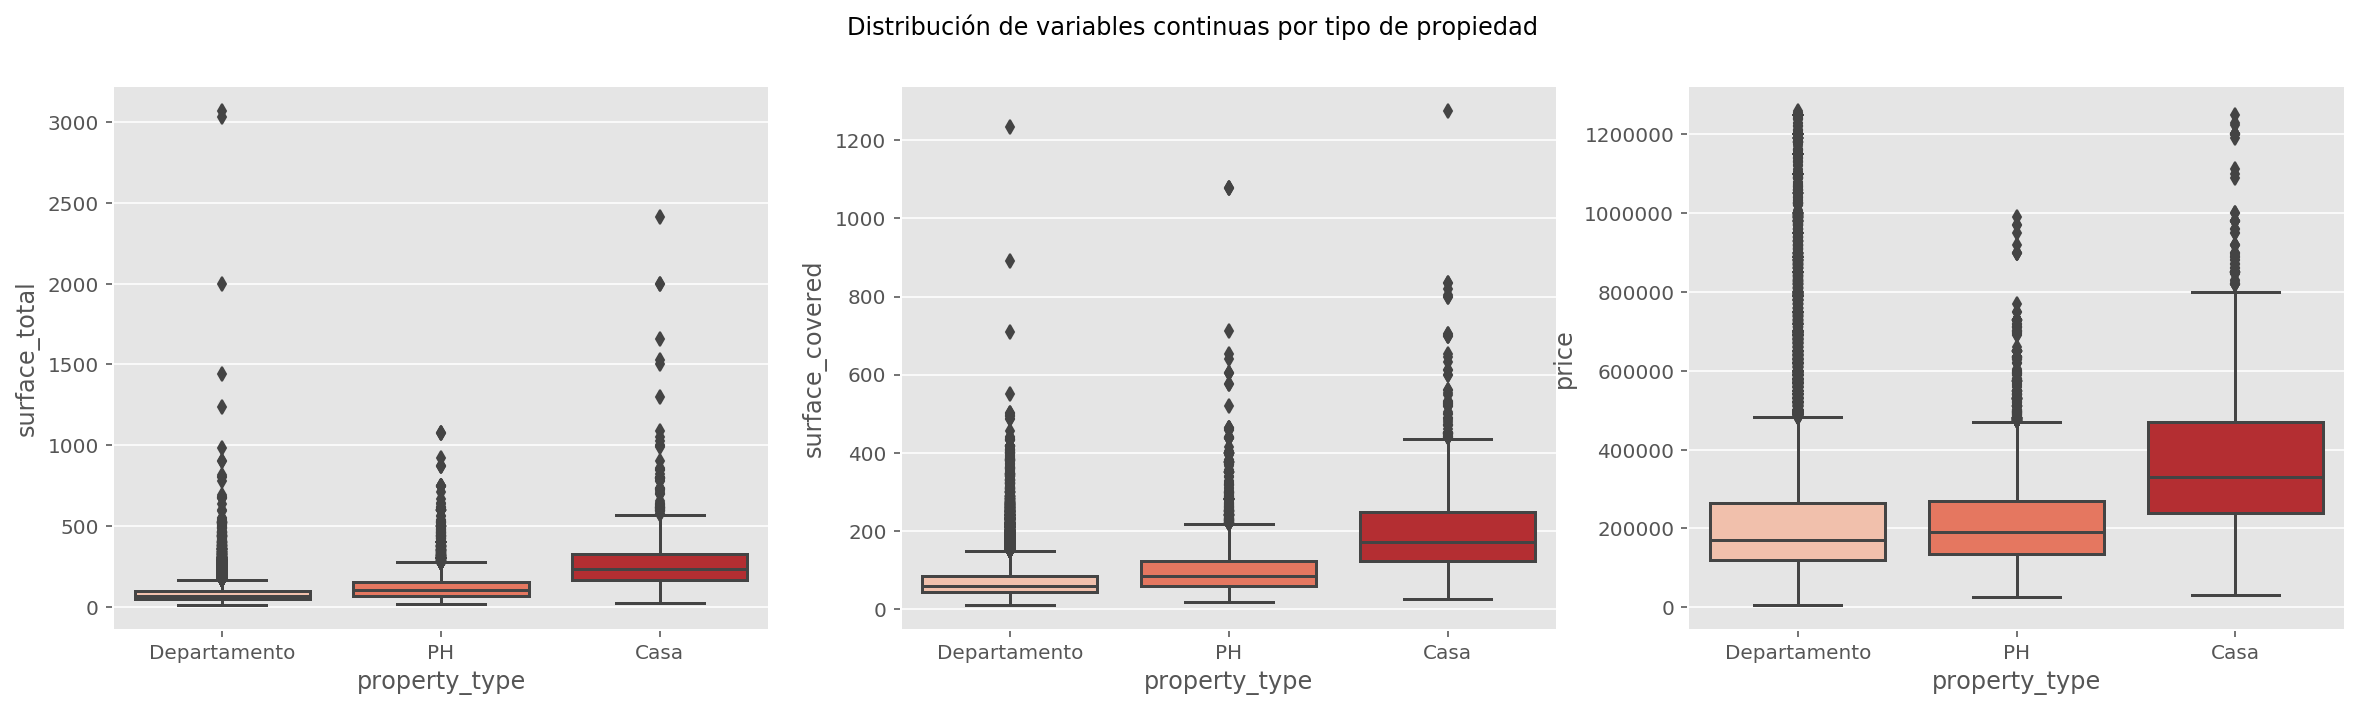

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(20,5));
fig.suptitle('Distribución de variables continuas por tipo de propiedad');
sns.boxplot( x=df5['property_type'], y=df5['surface_total'], palette="Reds", ax = axes[0]);
sns.boxplot( x=df5['property_type'], y=df5['surface_covered'], palette="Reds", ax = axes[1]);
sns.boxplot( x=df5['property_type'], y=df5['price'], palette="Reds", ax = axes[2]);

Observamos que el filtro aplicado permite dilucidar un poco la distribución de los datos, aún así continuamos teniendo muchos datos outliers en las variables continuas cuando las analizamos para cada tipo de propiedad.

Por último, miremos la forma final de las distribuciones de las variables continuas en función del tipo de propiedad:

<Figure size 720x480 with 0 Axes>

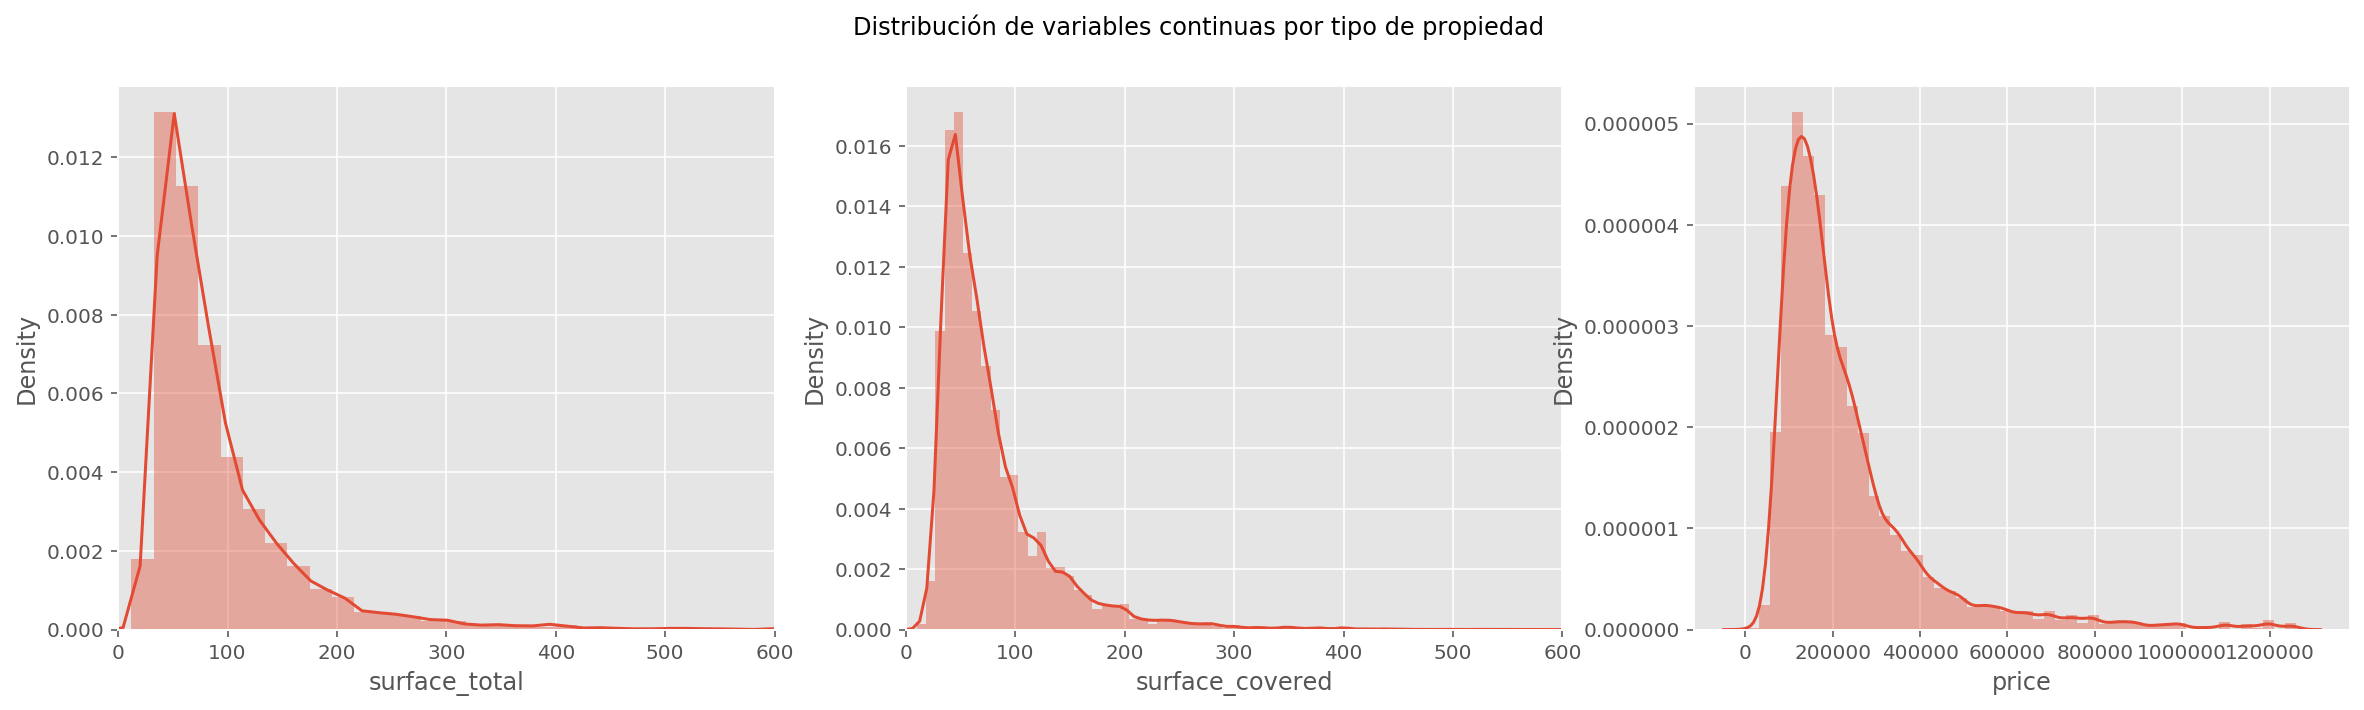

In [21]:
plt.figure(dpi=120);
fig, axes = plt.subplots(1, 3, figsize=(20,5));
fig.suptitle('Distribución de variables continuas por tipo de propiedad');
sns.distplot(df5['surface_total'],kde=True, bins=150, label= 'superficie total',ax=axes[0]);
axes[0].set_xlim(0,600)
sns.distplot(df5['surface_covered'],kde=True, bins=150, label= 'superficie cubierta',ax=axes[1]);
axes[1].set_xlim(0,600)
sns.distplot(df5['price'],kde=True, label= 'precio',ax=axes[2]);
plt.tight_layout;

Ahora miremos con cuantas instancias nulas hemos quedado después de aplicar los filtos

In [22]:
df5.isna().sum()

l2                   0
l3                   0
property_type        0
rooms                0
bedrooms             0
bathrooms          827
surface_total        0
surface_covered      0
price                0
dtype: int64

In [23]:
# Como no poseemos un información para otorgar un valor a la instancia de ba~nos, entonce los eliminaremos
df5.dropna(subset=['bathrooms'], inplace=True)
df5 = df5.reset_index(drop=True)

In [24]:
print(f'Hemos terminado con un dataset con {len(df5)} que representan el {np.round((df5.shape[0]/df.shape[0])*100, 2)}% de los datos del conjunto inicial')

Hemos terminado con un dataset con 78837 que representan el 97.01% de los datos del conjunto inicial


Miremos ahora la correlación entre las variables númericas del dataset (independiente del tipo de propiedad)

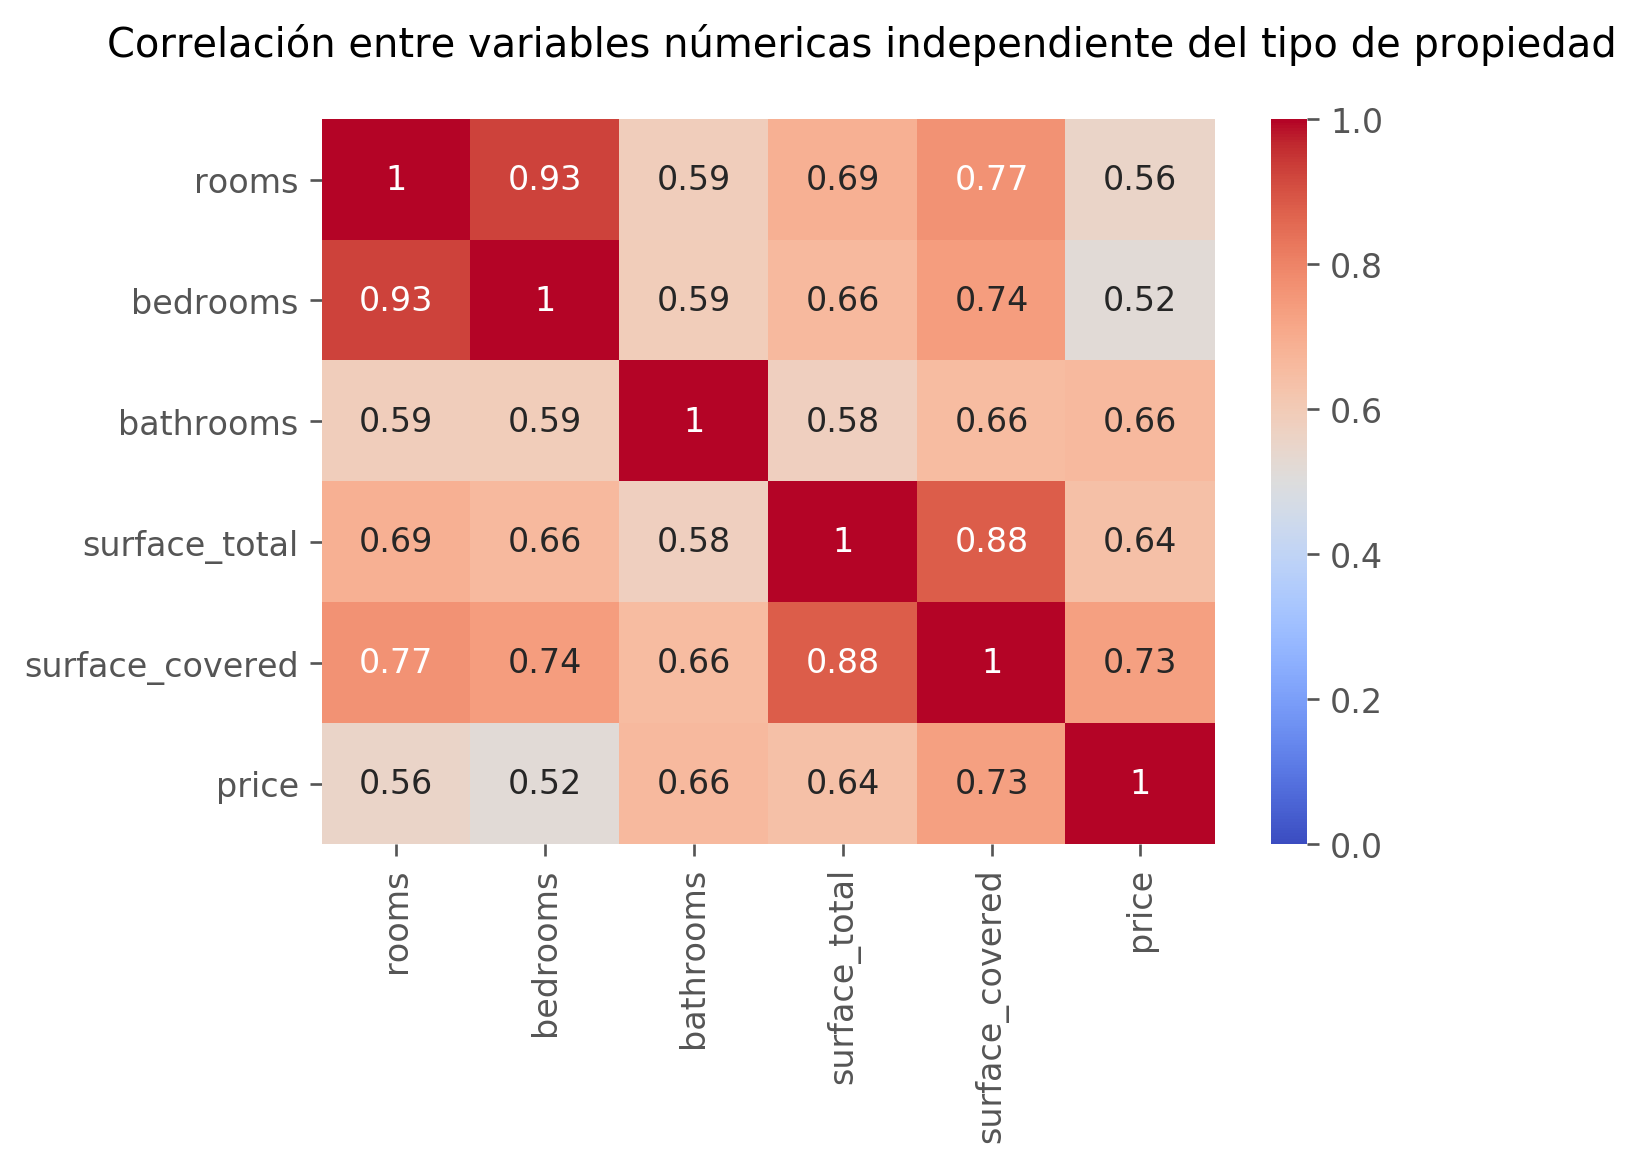

In [25]:
plt.figure(dpi=120)
plt.suptitle('Correlación entre variables númericas independiente del tipo de propiedad');
sns.heatmap(df5[[ "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]].corr(), annot=True, cmap='coolwarm', vmin=0);

Este gráfico nos indica que todas las variables númericas estan correlacionadas, pero para nuestro interes a futuro, que es predecir el precio de un inmueble, vemos que la última columna (price), tiene una alta correlación con con superficie total y cubierta (las cuales son variables continuas) y posee una correlación media con las demás variables que son discretas.

Existe algo importante que debemos revisar en la tabla de correlación y es la multicolinealidad entre variables que pueden usarse para modelos de predición a futuro. Pero en este proyecto no analizaré este topico.

# Criterio del IQR

El criterio de las 3$\sigma$ nos ha permitido garantizar la asimétria 'natural' que posee la distribución de variables continuas y trabajar con un dataset con un 97% de datos  del conjunto original, el problema es que no nos elimina la cantidad de datos outliers que se encuentran en cada distribución, lo cual será un problema cuando se desee implementar algun modelo de machine learning para entrenar un regresor que me permitar predecer una variable en terminos de las demás.
Por tal movimo intentaremos aplicar otro criterio de filtro llamado el criterio del IQR, el cual nos permite quedarnos con el 75% de los datos originales pero eliminando la mayor cantidad de outliers posibles en la distribución de las variables continuas.

In [26]:
def corte_IQR(df,variable):
    '''Calcula los puntos de corte en una variable continua de un dataset a partir del IQR
       Esta funcion tiene como entrada el dataset original y la variable continua que se desea
       cortar con el filtro IQR
       La función retorna el data set filtrado
    '''
    IQR = df[variable].quantile(0.75)-df[variable].quantile(0.25)
    bigote_inf = df[variable].quantile(0.25)-1.5*IQR
    bigote_sup = df[variable].quantile(0.75)+1.5*IQR
    
    if (bigote_inf < df[variable].min()):
        df2 = df[df[variable] >= df[variable].min()]
    else:
        df2 = df[df[variable] >= bigote_inf]
    if ( bigote_sup<df[variable].max()):
        df2 = df[df[variable] <= bigote_sup]
    else:
        df2 = df[df[variable] <= df[variable].max()]
    return df2

In [27]:
#LLamamos la funcion corte_IQR con el dataset original y las variables continuas de interes
dft = corte_IQR(df,'surface_total')
dfc = corte_IQR(dft,'surface_covered')
dfp = corte_IQR(dfc,'price')

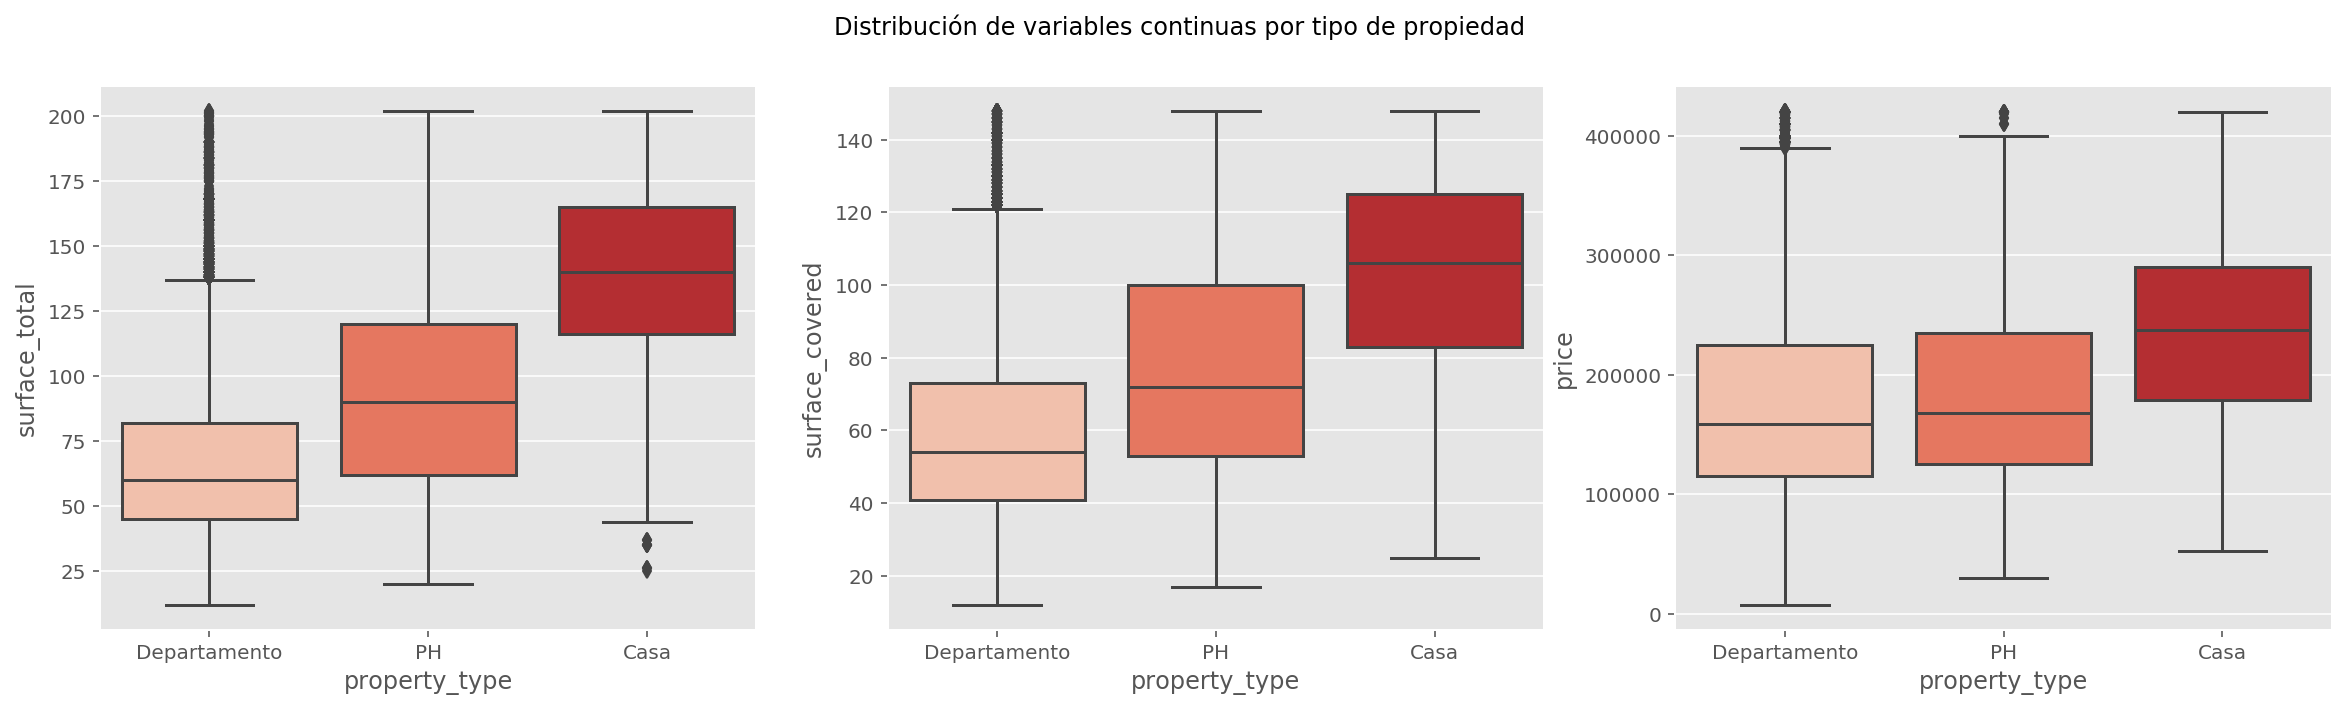

In [28]:
#Realizamos diagrama de cajas para verificar el filtro
fig, axes = plt.subplots(1, 3, figsize=(20,5));
fig.suptitle('Distribución de variables continuas por tipo de propiedad');
sns.boxplot( x=dfp['property_type'], y=dfp['surface_total'], palette="Reds", ax = axes[0]);
sns.boxplot( x=dfp['property_type'], y=dfp['surface_covered'], palette="Reds", ax = axes[1]);
sns.boxplot( x=dfp['property_type'], y=dfp['price'], palette="Reds", ax = axes[2]);

Como era de esperar hemos eliminado gran parte de datos  outliers, el gran problema ahora, hemos perdido la información de las colas (en como caen las distribuciones para valores lejanos de la media), esto lo podemos ver gráficando las ditribuciones, y es lo siguiente que realizaremos

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(20,5));
fig.suptitle('Distribución de variables continuas por tipo de propiedad');
sns.distplot(dfp['surface_total'],kde=True, bins = 20,label= 'superficie total',ax=axes[0]);
sns.distplot(dfp['surface_covered'],kde=True,bins = 20, label= 'superficie cubierta',ax=axes[1]);
sns.distplot(dfp['price'],kde=True,bins = 20, label= 'precio',ax=axes[2]);

Como habiamos mensionado anteriormente, este criterio me corta el comportamiento de las colas de la distribución. Información que puede ser relevante para ciertos análisis.

<a id="s-114"></a>
Ahora miremos que con cuantas instancias nulas hemos quedado despues de aplicar los filtos

In [30]:
dfp.isna().sum()

l2                   0
l3                   0
property_type        0
rooms                0
bedrooms             0
bathrooms          708
surface_total        0
surface_covered      0
price                0
dtype: int64

In [31]:
# Como no poseemos un información para otorgar un valor a la instancia de ba~nos, entonce los eliminaremos
dfp.dropna(subset=['bathrooms'], inplace=True)
dfp = dfp.reset_index(drop=True)

In [32]:
print(f'Hemos terminado con un dataset con {len(dfp)} que representan el {np.round((dfp.shape[0]/df.shape[0])*100, 2)}% de los datos del conjunto inicial')

Hemos terminado con un dataset con 67396 que representan el 82.93% de los datos del conjunto inicial


Miremos ahora la correlacion entre las variables númericas del dataset (independiente del tipo de propiedad)

In [33]:
plt.figure(dpi=120)
plt.suptitle('Correlación entre variables númericas independiente del tipo de propiedad');
sns.heatmap(dfp[[ "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]].corr(), annot=True, cmap='coolwarm', vmin=0);

Al ver la columna de precios, observamos una alta correlación con las demás variables, incluso númericamente tenemos mayor correlación con al aplicar el filtro IQR que el de las 3$\sigma$, el gran problema es que hemos eliminado información que pueda ser relevante para futuros análisis.

En este punto hemos aprendido que las variables continuas las cuales possen mayor dispersión en sus ditribuciones, son también las que más contribuyen a la correlación de la variable precio. Por tanto, nos generamos la pregunta: Podrá existir 
otra forma de filtrar los datos que nos permita quedarnos con la mayor cantidad de datos y a su vez se respete la asimétria
de las distribuciones? La respuesta la intentaremos abordar con el siguiente método.

# Transformación de variables continuas

Hemos visto que los datos de las variables continuas son los que poseen mayor cantidad de datos outliers, a su vez estos datos hacen que se alarguen las colas de la distribución los cual se refleja en la gran cantidad de datos con valor númerico muy por encima del valor medio de la variable. Por tanto, será posible transformar las variables continuas de tal modo que los datos mas alejados del valor medio de una variable ya no este tan distanciado. 
La respuesta se encuenta realizando una transformación lineal a las variables continuas, y entre todas las posibles alternativas esta usar el logaritmo natural, tal que:
\begin{equation}
\mathbf{x}\mapsto \text{Ln}(\mathbf{x})
\end{equation}
donde $\mathbf{x}$ representa una variable continua que toma valores mayores que cero (para evitar divergencias).
Con esta transformación, podemos trabajar con el $\text{Ln}(\mathbf{x})$ y ver el comportamiento de las distribuciones y los datos outliers.

In [34]:
#Transformamos las variables continuas
continue_features = df[['surface_total','surface_covered','price']]
df_transf = np.log(continue_features)
categorical_features = df[['l2','l3','property_type']]
discret_features =  df[['rooms','bedrooms','bathrooms']]
#constuimos el nuevo dataset con la transformación de las variables continuas, las discretas y las categoricas que teniamos antes
df_nw = pd.concat([categorical_features,discret_features,df_transf], axis =1)

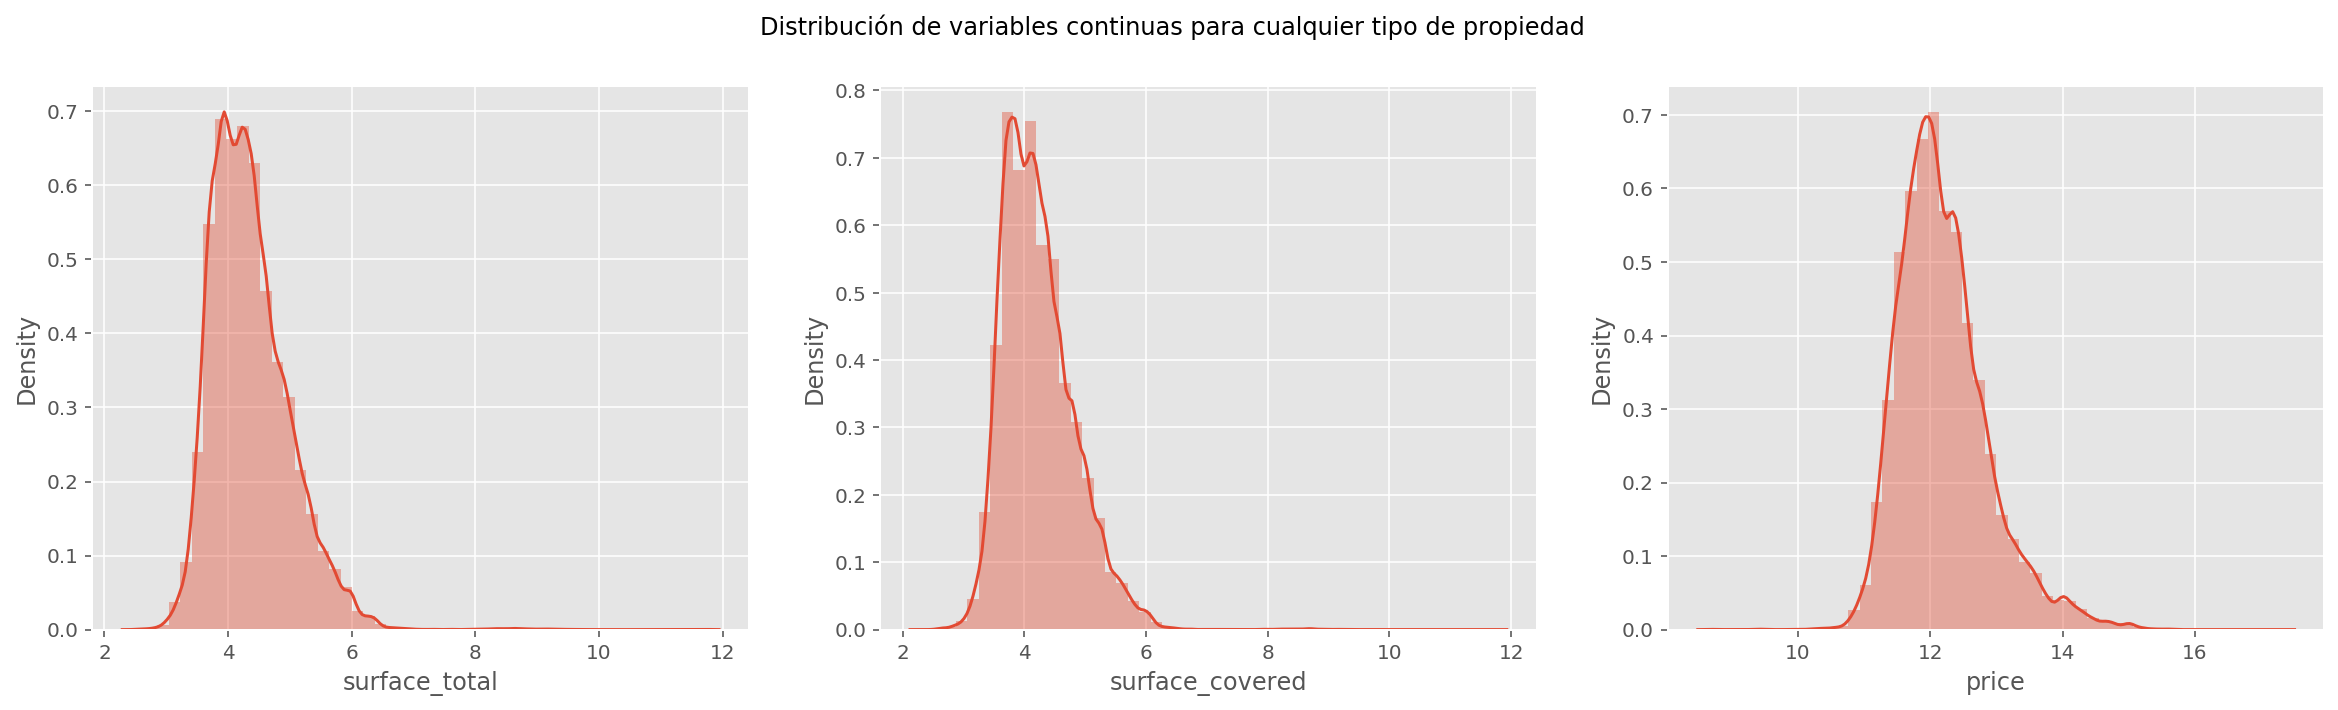

In [35]:
#Realizamos diagrama para ver como se comportan las distribuciones
fig, axes = plt.subplots(1, 3, figsize=(20,5));
fig.suptitle('Distribución de variables continuas para cualquier tipo de propiedad');
sns.distplot(df_nw['surface_total'],kde=True,label= 'superficie total',ax=axes[0]);
sns.distplot(df_nw['surface_covered'],kde=True, label= 'superficie cubierta',ax=axes[1]);
sns.distplot(df_nw['price'],kde=True, label= 'precio',ax=axes[2]);
plt.tight_layout;

Vemos que los datos transformados siguen respetando el comportamiento de las colas del dataset original, esta vez vemos que la transformación reduce la 'distancia' entre los datos outliers y el valor medio de cada variables, esto puede evidenciarse en el diagrama de cajas.

In [36]:
#Realizamos diagrama de cajas para verificar outliers
fig, axes = plt.subplots(1, 3, figsize=(20,5));
fig.suptitle('Distribución de variables continuas por tipo de propiedad');
sns.boxplot( x=df_nw['property_type'], y=df_nw['surface_total'], palette="Reds", ax = axes[0]);
sns.boxplot( x=df_nw['property_type'], y=df_nw['surface_covered'], palette="Reds", ax = axes[1]);
sns.boxplot( x=df_nw['property_type'], y=df_nw['price'], palette="Reds", ax = axes[2]);

Continuamos teniendo datos outliers pero estas se encuentra menos alejados del valor medio de cada distribución.

In [37]:
df_nw.isna().sum()

l2                   0
l3                   0
property_type        0
rooms                0
bedrooms             0
bathrooms          833
surface_total        0
surface_covered      0
price                0
dtype: int64

In [40]:
# Como no poseemos un información para otorgar un valor a la instancia de ba~nos, entonce los eliminaremos
df_nw.dropna(subset=['bathrooms'], inplace=True)
df_nw = df_nw.reset_index(drop=True)

In [41]:
print(f'Hemos terminado con un dataset con {len(df_nw)} que representan el {np.round((df_nw.shape[0]/df.shape[0])*100, 2)}% de los datos del conjunto inicial')

Hemos terminado con un dataset con 80434 que representan el 98.97% de los datos del conjunto inicial


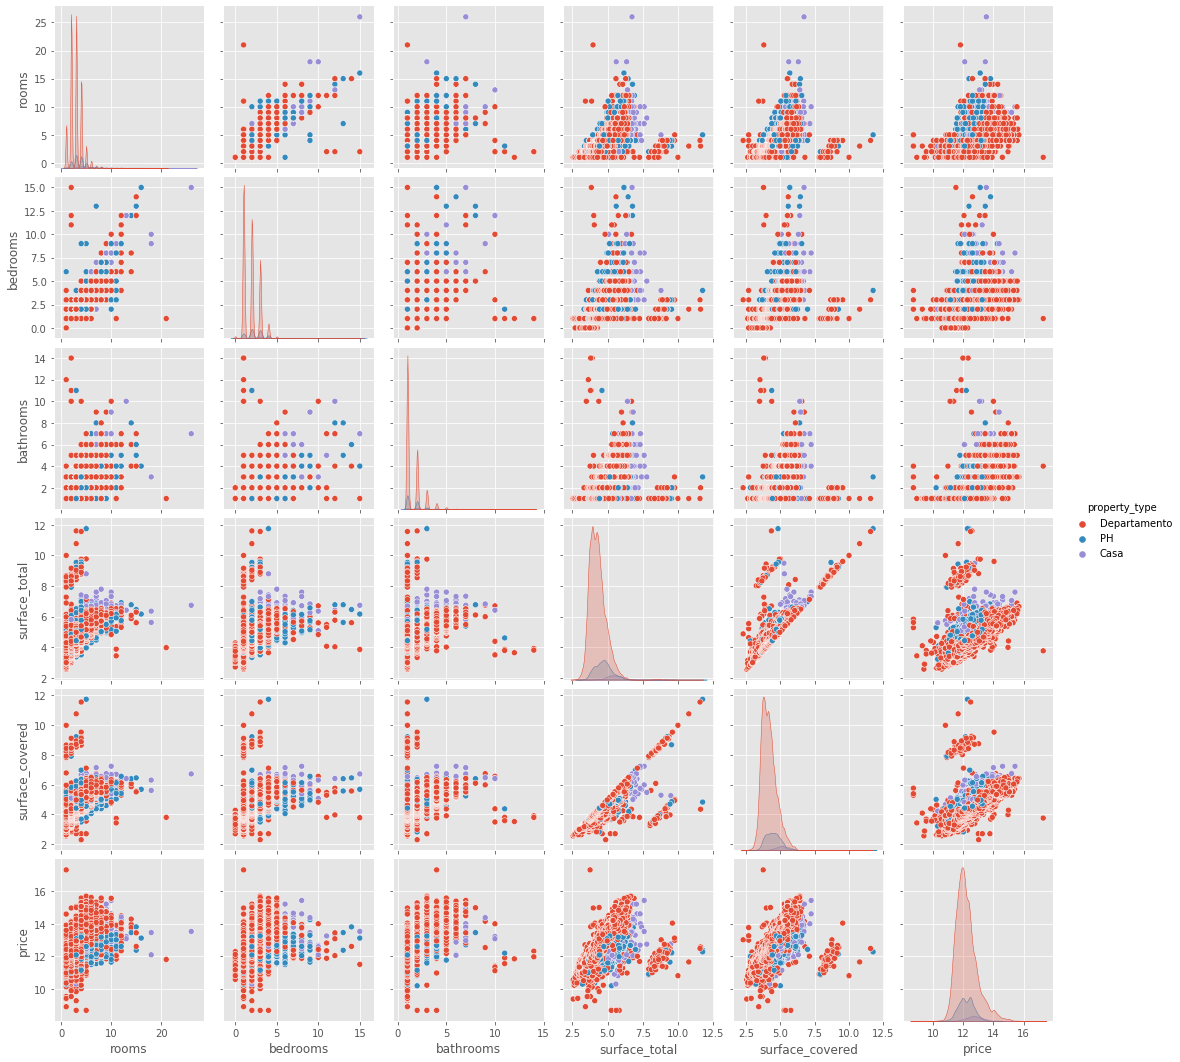

In [298]:
sns.pairplot(df_nw, hue = 'property_type')

In [42]:
plt.figure(dpi=120)
plt.suptitle('Correlación entre variables númericas independiente del tipo de propiedad');
sns.heatmap(df_nw[[ "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]].corr(), annot=True, cmap='coolwarm', vmin=0);

Con este nuevo filtro de transformación, hemos repectado la asimétria de los datos, menos tenido la mayor cantidad de datos originales y hemos aumentado la correlación en todas las variables.

<a id="s-1ad"></a>
7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [43]:
#Filtro para ver correlación por cada tipo de propiedad
df_nw_dp =df_nw[df_nw.property_type=='Departamento']
df_nw_ph =df_nw[df_nw.property_type=='PH']
df_nw_casa =df_nw[df_nw.property_type=='Casa']


<Figure size 720x480 with 0 Axes>

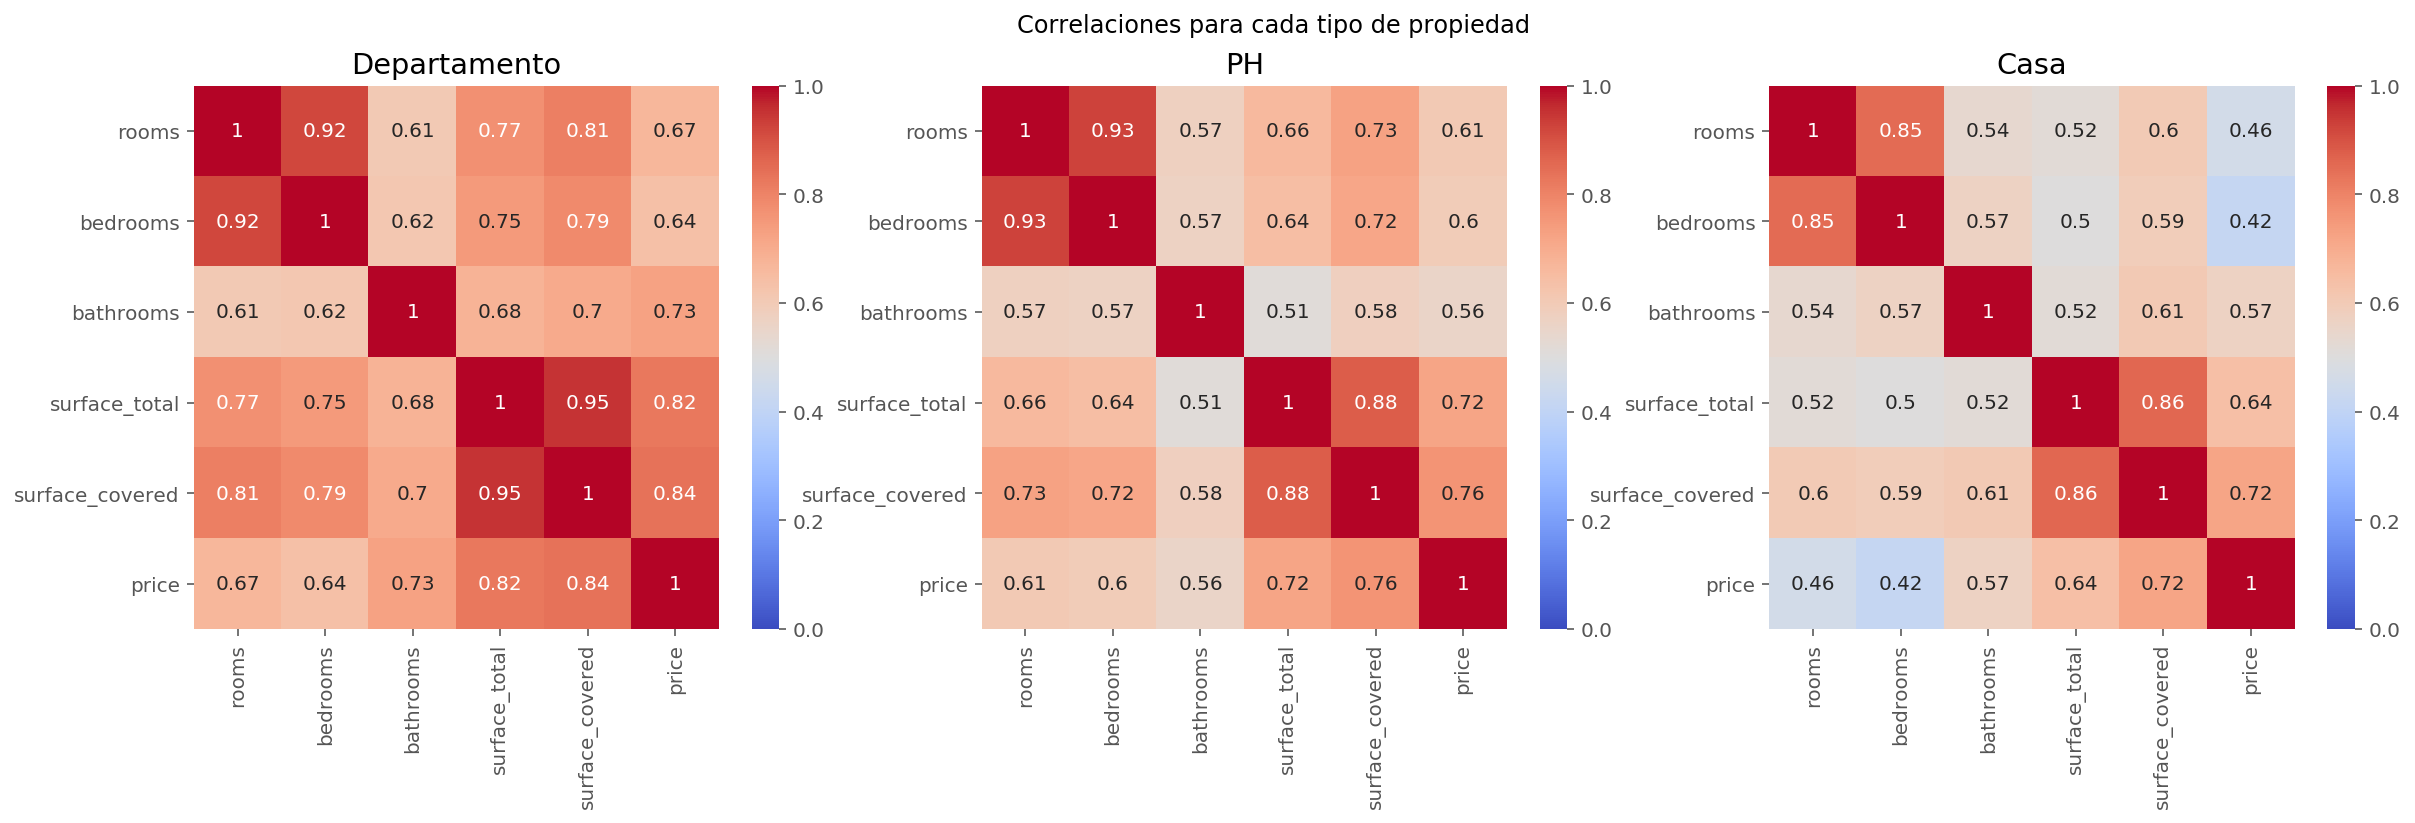

In [44]:
plt.figure(dpi=120)
fig, axes = plt.subplots(1, 3, figsize=(20,5));
fig.suptitle('Correlaciones para cada tipo de propiedad');
sns.heatmap(df_nw_dp[[ "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]].corr(),annot=True, cmap='coolwarm', vmin=0,ax=axes[0]);
axes[0].set_title('Departamento');
sns.heatmap(df_nw_ph[[ "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]].corr(), annot=True, cmap='coolwarm', vmin=0,ax=axes[1]);
axes[1].set_title('PH');
sns.heatmap(df_nw_casa[[ "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]].corr(), annot=True, cmap='coolwarm', vmin=0,ax=axes[2]);
axes[2].set_title('Casa');


Vemos que la correlación entre las variables númericas varia dependiendo del tipo de propiedad del dataset, por tanto el tipo de propiedad que es un atributo categorico, tiene relevancia para futuros modelos de predición

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


In [45]:
#Barrio más costoso
def df_barrio(barrio): 
     '''Esta función filtra el dataset con las varialbes transformadas por barrios
        Como entrada tenemos el nombre de barrio
        y como salida tenemos un dataset con la información solo del barrio de entrada'''
        
     return df_nw[df_nw.l3 == barrio]


barrios = df['l3'].unique() #listamos el nombre de los barrios
propiety_barrio = [] #lista de dataset que guardara la información para cada barrio
barrio_mean = []  #Lista que guarda el precio medio para cada barrio
for barrio in barrios: #ciclo para llenar las anteriores listas
    df_p = df_barrio(barrio)
    barrio_mean.append(df_p.price.mean())
    propiety_barrio.append(df_p)

promedio = pd.Series(barrio_mean)
promedio.max()
i = np.where(barrio_mean == np.max(barrio_mean))
promedio = pd.Series(barrio_mean)
print(f'El bario con mayor valor es: {propiety_barrio[i[0][0]].l3.unique()[0]}')

El bario con mayor valor es: Puerto Madero


Hemos mirado el valor medio del precio de las propiedades vendidas en cada barrio que posee información en el dataset, y hemos encontrado que el barrio mas costoso es Puerto Madero, información que al menos en primera aproximación esta acorde con lo encontrado en [Wikipedia]. Es claro que este dataset solo es una muestra de toda la  'población' de ventas de propiedad existentes en Argentina, por tanta de entrada ha de existir un sesgo ('incertidumbre') en la respuesta encontrada.

<a id="s-12"></a>
## Número de caracteres en los anuncios de ventas por tipos de propiedad 

A continuación solo como ejercicio exploratorio de datos, revisaremos si existe algún patrón en la cantidad de caracteres que se utilizan en una publicación para cada tipo de propiedad. Para ello iniciaremos con nuestra dataset madre (**data**) el cual no sele ha realizado ningun filtro.

Para nuestra tarea iniciaremos contando el número de caracteres en el título y descripción de  cada publicación y los guardaremos en una nuevas colunmas.

In [47]:
data['numero_caracter_title']  = data['title'].str.len()
data['numero_caracter_description']  = data['description'].str.len()

Posterior, graficaremos la distribuciones que presentan el número de caracteres para cada tipo de propiedad

<Figure size 720x480 with 0 Axes>

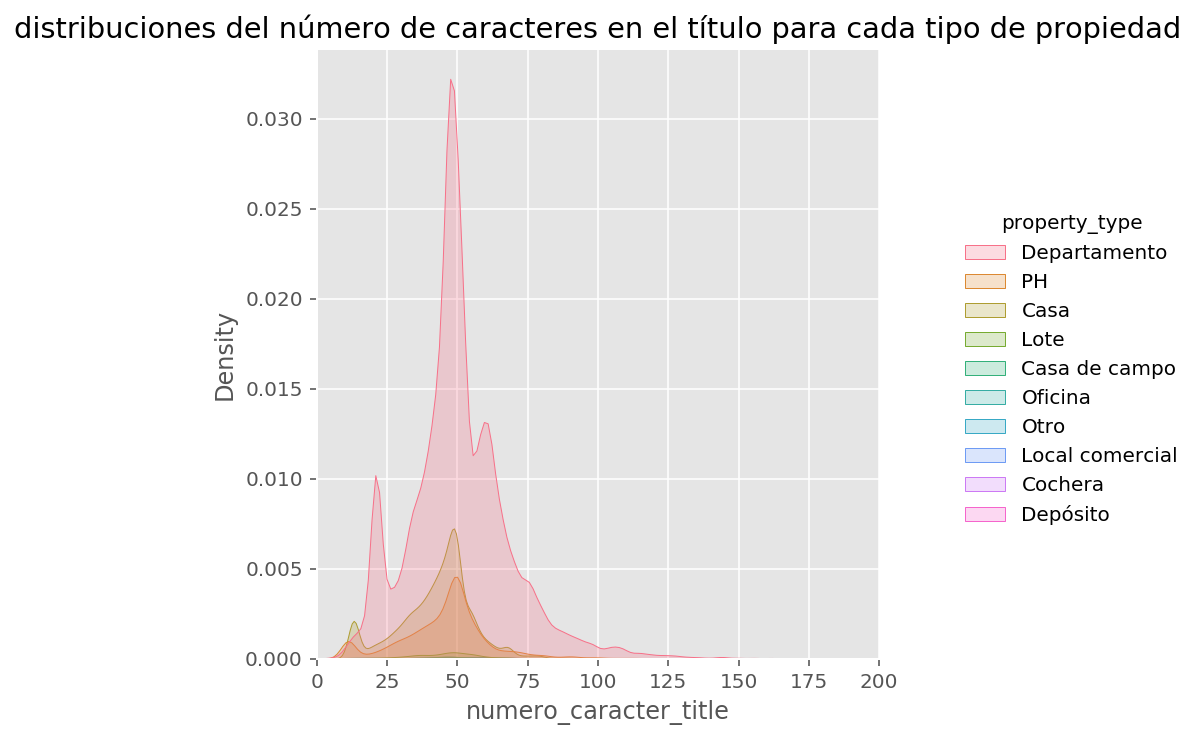

In [49]:
plt.figure(dpi=120);
ax = sns.displot(data, x="numero_caracter_title",hue="property_type", kind="kde", fill=True);
plt.title('distribuciones del número de caracteres en el título para cada tipo de propiedad');
plt.xlim(0,200);
plt.show();

Esta grafica nos indica varias cosas interesantes, primero: en general cada tipo de propiedad posee la misma distribución el el número de caracteres en el título de sus publicaciones, pero lo curioso es que estas distribuciones son multimodales, por ejemplo, los depatamentos (que es donde existen más instancias) posee 3 picos o modos bien definidos (a que lugar pertenecera cada modo?), de igual forma ocurre para los demás tipos de propiedad.

Revisemos de forma 'poco rigurasa' solo para tener una idea, a que instancias de departamento pertenece el modo más resonante (más alto) 

In [50]:
data_dp = data[data.property_type=='Departamento']
data_title_min = data_dp[data_dp['numero_caracter_title']>45]
data_title = data_title_min [data_title_min['numero_caracter_title']<55]
data_title.l2.value_counts()

Capital Federal             28216
Bs.As. G.B.A. Zona Norte     3596
Bs.As. G.B.A. Zona Sur       1909
Bs.As. G.B.A. Zona Oeste     1430
Name: l2, dtype: int64

Vemos que principalmente este pico pertenece a publicaciones realizadas en Capital Federal

Por último miremos si el comportamiento para la descripción

In [51]:
plt.figure(dpi=120)
ax = sns.displot(data, x="numero_caracter_description",hue="property_type", kind="kde", fill=True);
plt.title('distribuciones del número de caracteres en la descripción para cada tipo de propiedad');
plt.xlim(0,6000);

<Figure size 720x480 with 0 Axes>

In [52]:
print(f'Vemos que todas las distribuciones se comportan igual y el valor medio del número de caracteres en la describción es de {int(data.numero_caracter_description.mean())} caracteres')

Vemos que todas las distribuciones se comportan igual y el valor medio del número de caracteres en la describción es de 1023 caracteres


<a id="s-13"></a>
# 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.
<a id="s-1131"></a>

In [53]:

df= data[(data.property_type.isin(['Departamento','Casa','PH'])) & (data.l2 == 'Capital Federal')].copy()
df = df[(df.surface_total >= 15) & (df.surface_total <= 1000)]
df = df[df.price <= 4000000]
df = df[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']]
df.dropna(inplace=True)
print(f'Checkpoint con filtro indicado: Dataset con {df.shape[0]} instancias y {df.shape[1]} columnas')

Checkpoint con filtro indicado: Dataset con 81019 instancias y 6 columnas


Dividimos nuestro dataset en las variables predictoras y a predecir

In [54]:
#Separamos la variable a predecir de nuestro conjunto de datos que seran la matriz X,
X = df.drop(['price'], axis=1)
# Conjunto de datos a predecir, vector y
y = df['price']

Importo libreria para realizar división del conjunto de datos a tratar, en conjunto de datos de entrenamiento y prueba, usaremos la convensión 70% entrenamiento, 30% prueba y usaremos el parametro *random_state=2020* para garantizar siempre la misma partición.

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

A continuación importamos la librerias de knn, arboles de decisión sus modelos de regresión, adicional importamos la métrica para evaluar el modelo, la cual sera la raiz del error cuadratico medio *RMSE* y el coeficiente de determinación $R^2$. 
Usaremos la métrica *RMSE* dado que es sensible a valores outliers en el conjunto de datos, por tanto de entrada, nuestros modelos de entrenamiento serán poco eficientes, dado que hasta el momento no hemos realizado ninguna transformación.
En adición usaremos el coeficiente de determinación que en primera aproximación nos puede dar información sobre que tan bueno es el ajuste.

Es necesario aclarar que en este caso $R^2$ no es una buena métrica de evaluación, pues este solo es relevante un modelo con solo una variable independiente, en nuestro modelo de entrenamiento tenemos 5 variables, que en en principio 4 de ellas son linealmente independientes. En casos con más de una variable independiente es más útil usar $R^2_{Adjusted}$

Existe otra métrica útil de considerar como lo es Root Mean Squared Logarithmic Error, pero en este caso no la usaremos.

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


A continuación generaremos un modelo benchmark y lo  evaluaremos, sin nuestro punto de partida para ir mejorando
nuestros resultados con otros modelos y  técnicas.

<a id="s-132"></a>
## Benchmark

In [57]:
def Benchmark(X_train, y_train, X_test, y_test):
    '''X_train: arreglo de numpy de shape (n, m) con las características de entrenamiento
       y_train: arreglo de numpy de shape (n,) con las etiquetas de clase de entrenamiento
       X_test: arreglo de numpy de shape (n, m) con las características de prueba
       y_test: arreglo de numpy de shape (n,) con las etiquetas de prueba
       Solo imprime en pantalla el RMSE para el conjunto de entrenamiento, prueba y R**2 y grafica nuestro mode base'''
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_train_pred = linear_model.predict(X_train)
    y_test_pred = linear_model.predict(X_test)
    residuo = (y_test_pred-y_test)/10**6
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    
    #Grafico función
    plt.figure(dpi=120);
    plt.scatter(y_test_pred/10**6,y_test/10**6, s=10,alpha=0.9, color='r');
    plt.legend();
    plt.xticks();
    plt.title("Modelo lineal: Benchmark");
    plt.ylabel("precio real(USD)*10^6");
    plt.xlabel("precio predicho(USD)*10^6");
    print(f'Raíz del error cuadrático medio en Train: {rmse_train:0.3f}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test:0.3f}')
    print(f'Coeficiente de Determinación por r2_score: {r2:0.3f}')
    
    
    plt.figure(dpi=120,figsize=(20,10))

    plt.subplot(2,3,1)

    plt.hist(residuo, bins = 500,density=True, facecolor='r', alpha=0.75)
    plt.title("Histogram for Residuals")
    plt.ylabel("Cuentas");
    plt.xlabel("Precio(USD)10^6");
    plt.xlim(-1,1)

    from scipy import stats


    plt.subplot(2,3,2)
    stats.probplot(x = residuo, dist = "norm", plot = plt)
    plt.title("QQ Plot for Residuals")
    plt.show()



No handles with labels found to put in legend.


Raíz del error cuadrático medio en Train: 200764.339
Raíz del error cuadrático medio en Test: 198599.935
Coeficiente de Determinación por r2_score: 0.557


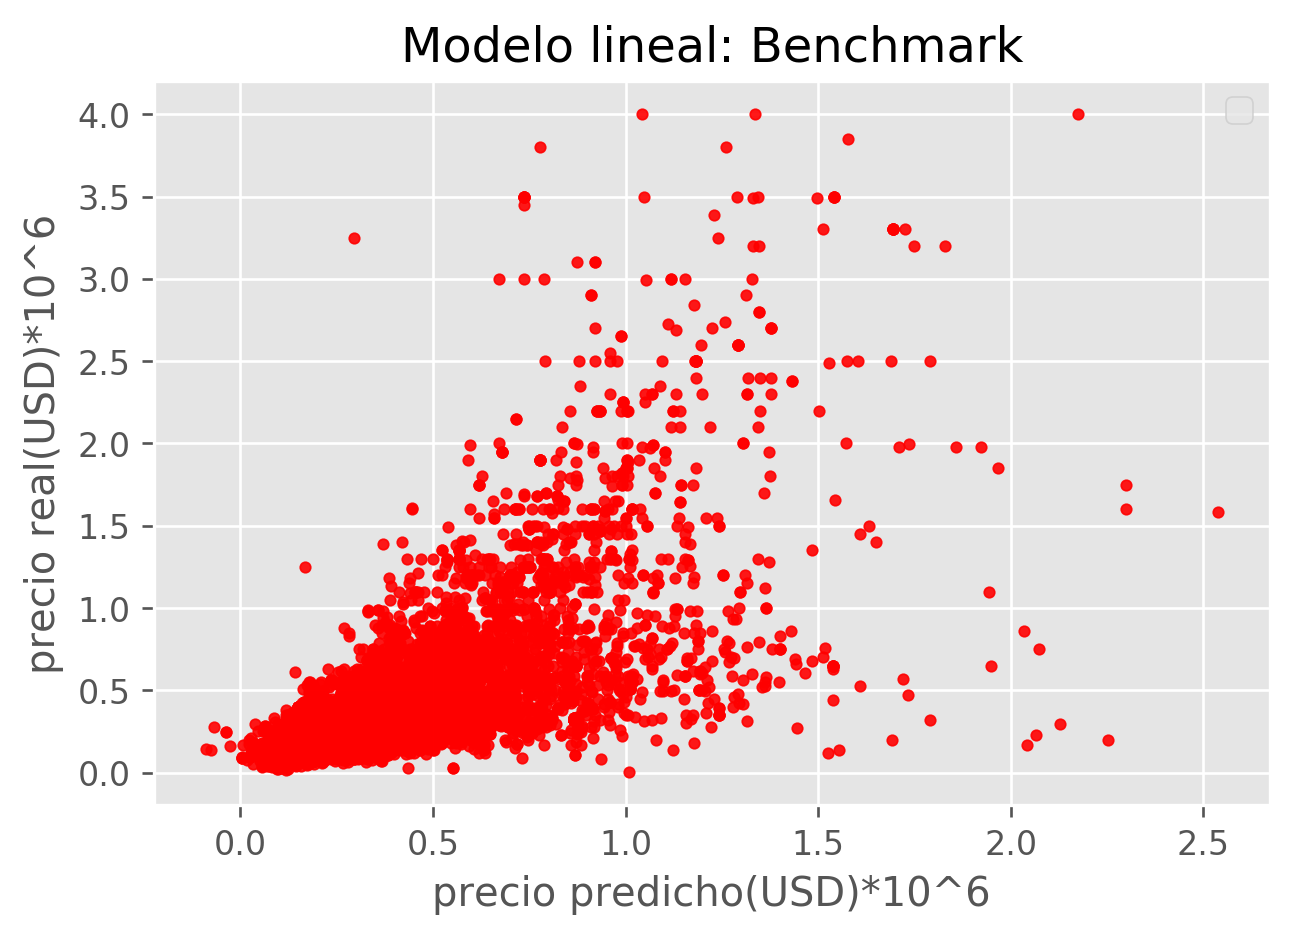

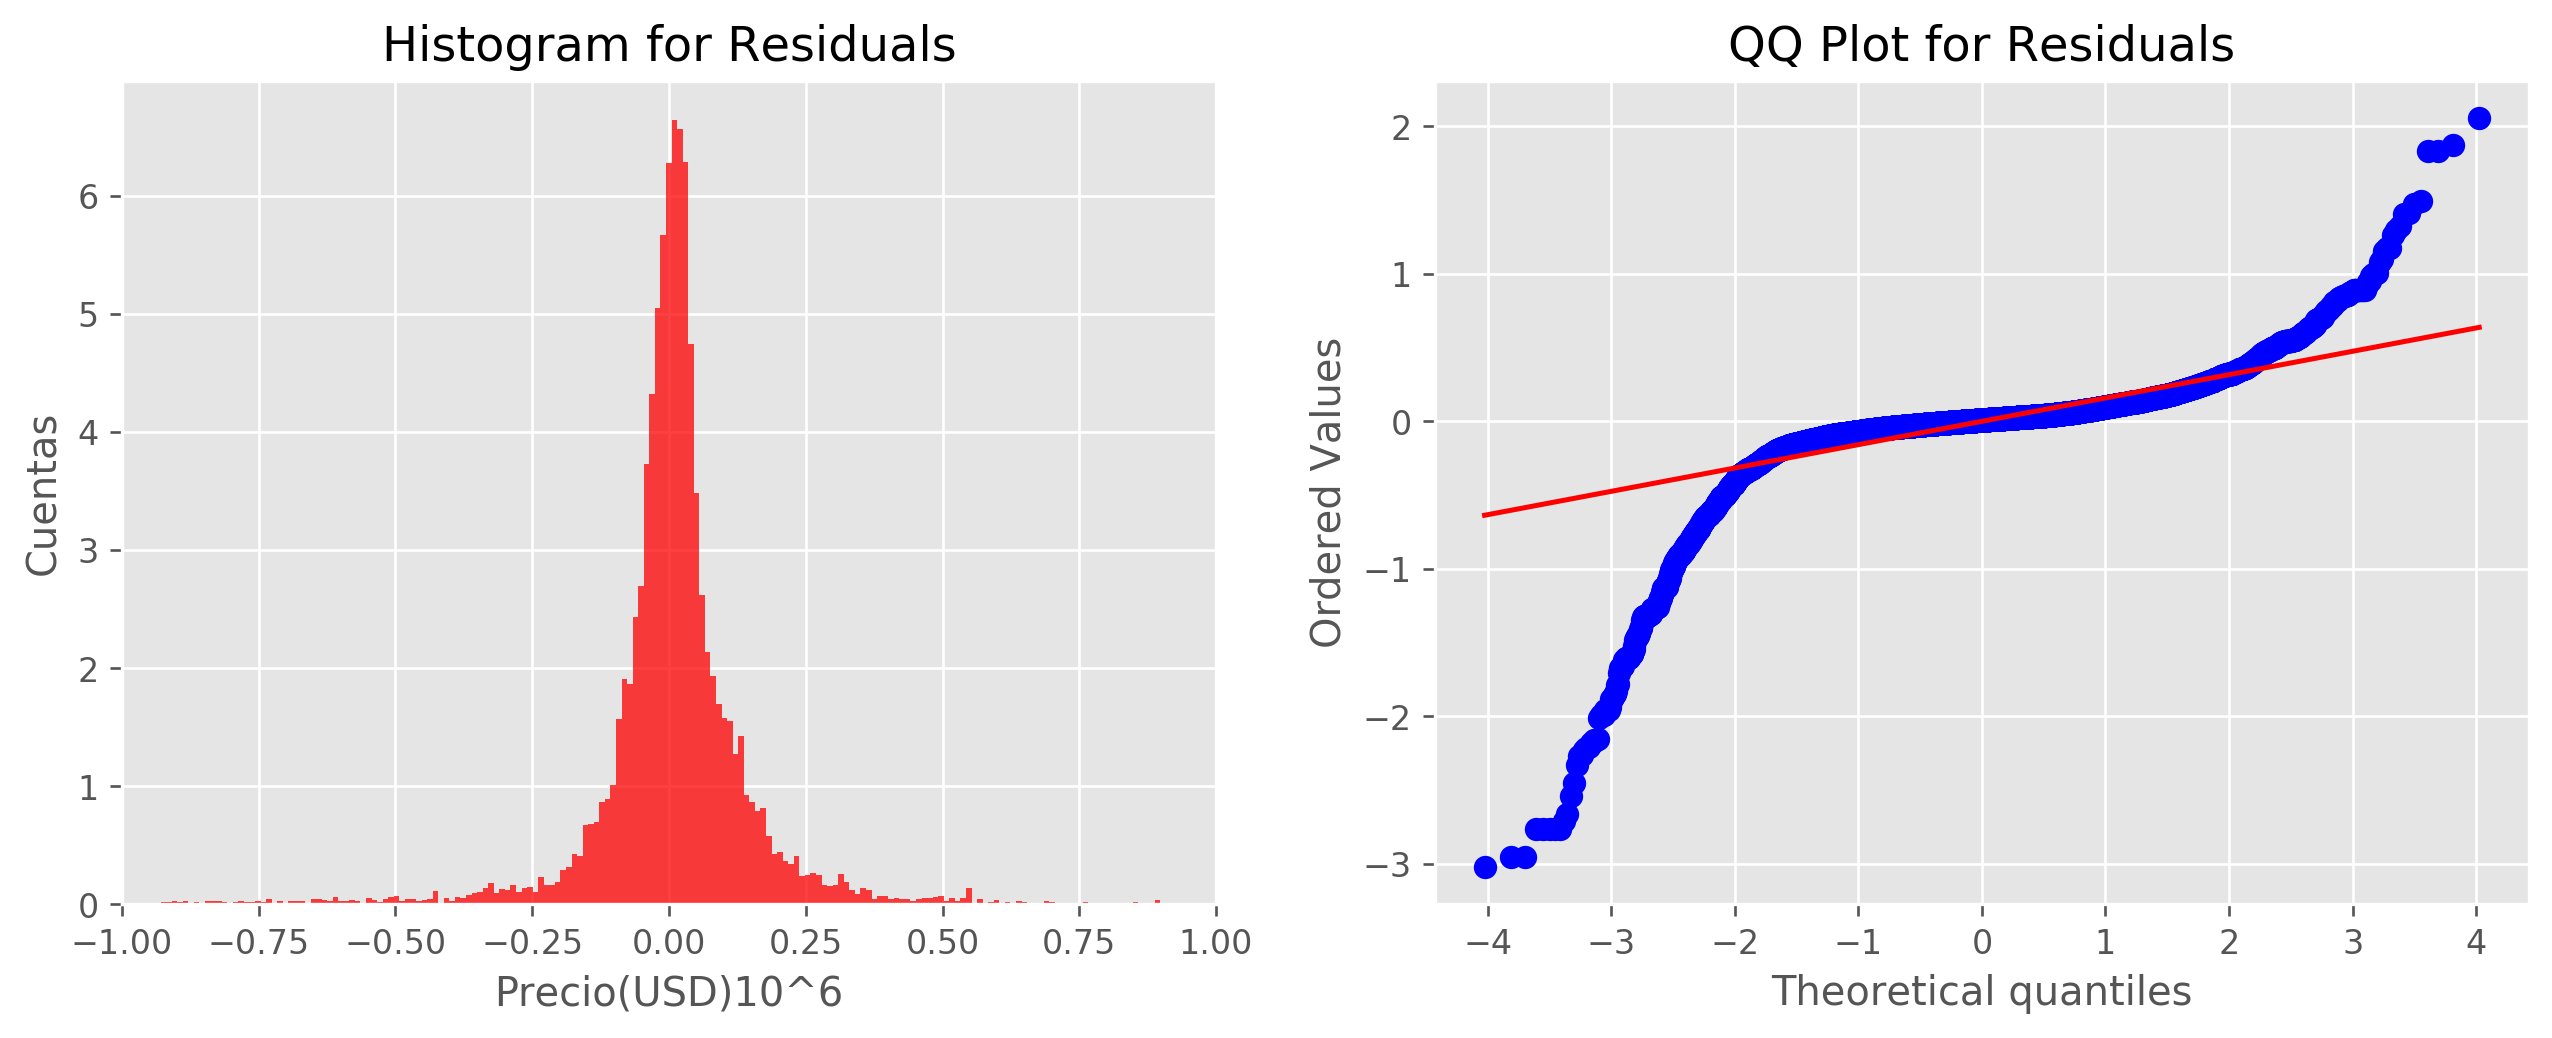

In [58]:
Benchmark(X_train, y_train, X_test, y_test)

La raíz del error cuadrático medio en los conjuntos de entrenamiento y prueba nos indica un muy mal modelo de entrenamiento, la razón principal se debe a la gran dispersión de los datos con los que estamos entrenando el modelo,
es decir, en nuestro conjunto de entrada existen aún muchos datos outliers que hace que la métrica de evaluación la cual es sensible a valores atípicos no prediga bien.
En las dos últimas gráficas mostramos la distribuciones de los residuos y vemos que tiene un comportamiento normal y centrado en cero, pero para ser más precisos usamos la gráfica de QQ de residuos, que me indican que tan cercana esta la distribución de residuos a una distribución normal. En esta vemos de los valores extremos (puntos azules) estan muy alejaos del comportamiento de una normal (linea roja).

Nuentro proposito es entonces ir paso a paso mejorando el resultado arrogado por la métrica con regresores realizados con knn y arboles.

In [59]:
  '''X_train: arreglo de numpy de shape (n, m) con las características de entrenamiento
       y_train: arreglo de numpy de shape (n,) con las etiquetas de clase de entrenamiento
       X_test: arreglo de numpy de shape (n, m) con las características de prueba
       y_test: arreglo de numpy de shape (n,) con las etiquetas de prueba
       kk=un conjunto de hiperparametros para knn
       La función grafica el valor predicho vs el valor real del precio de un inmueble y da su respetivo rmse'''
        

'X_train: arreglo de numpy de shape (n, m) con las características de entrenamiento\n     y_train: arreglo de numpy de shape (n,) con las etiquetas de clase de entrenamiento\n     X_test: arreglo de numpy de shape (n, m) con las características de prueba\n     y_test: arreglo de numpy de shape (n,) con las etiquetas de prueba\n     kk=un conjunto de hiperparametros para knn\n     La función grafica el valor predicho vs el valor real del precio de un inmueble y da su respetivo rmse'

 <a id="s-133"></a>
 ## Regresión por vecinos cercanos casos particulares

In [60]:
def knn_regresion(X_train, y_train, X_test, y_test,kk):
    '''X_train: arreglo de numpy de shape (n, m) con las características de entrenamiento
       y_train: arreglo de numpy de shape (n,) con las etiquetas de clase de entrenamiento
       X_test: arreglo de numpy de shape (n, m) con las características de prueba
       y_test: arreglo de numpy de shape (n,) con las etiquetas de prueba
       kk=un conjunto de hiperparametros para knn
       La función grafica el valor predicho vs el valor real del precio de un inmueble y da su respetivo rmse'''
    
    y_test_pred = []
    y_train_pred = []
    rmse_train = []
    rmse_test = []
    r2 = []
    cont = 0
    for i in kk:
        knn = KNeighborsRegressor(n_neighbors= i)
        knn.fit(X_train, y_train)
        y_test_pred.append(knn.predict(X_test))
        y_train_pred.append(knn.predict(X_train))
        rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred[cont])))
        rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred[cont])))
        r2.append(r2_score(y_test, y_test_pred[cont]))
        cont+=1
    fig, axs = plt.subplots(2, 2, figsize=(12,12))
    fig.suptitle('Precio predicho vs Precio real por Knn');
    axs[0, 0].scatter(y_test_pred[0]/10**6, y_test/10**6,s=10,alpha=0.9, color='b')
    axs[0, 0].set_title(f'Hiperparameto:{kk[0]}\n rmse_train:{rmse_train[0]:0.1f}\n rmse_test:{rmse_test[0]:0.1f}')
    axs[0, 1].scatter(y_test_pred[1]/10**6, y_test/10**6,s=10,alpha=0.9, color='b')
    axs[0, 1].set_title(f'Hiperparameto:{kk[1]}\n rmse_train:{rmse_train[1]:0.1f}\n rmse_test:{rmse_test[1]:0.1f}')
    axs[1, 0].scatter(y_test_pred[2]/10**6, y_test/10**6,s=10,alpha=0.9, color='b')
    axs[1, 0].set_title(f'Hiperparameto:{kk[2]} \n rmse_train:{rmse_train[2]:0.1f}\n rmse_test:{rmse_test[2]:0.1f}')
    axs[1, 1].scatter(y_test_pred[3]/10**6, y_test/10**6,s=10,alpha=0.9, color='b')
    axs[1, 1].set_title(f'Hiperparameto:{kk[3]}\n rmse_train:{rmse_train[3]:0.1f}\n rmse_test:{rmse_test[3]:0.1f}')

    for ax in axs.flat:
        ax.set(xlabel='Precio predicho (USD)*10^6', ylabel='Precio real (USD)*10^6')
    for ax in axs.flat:
        ax.label_outer()


    
        
    
    

In [61]:
kk=[1,2,3,50]

In [62]:
knn_regresion(X_train, y_train, X_test, y_test, kk)

Estos solo son caso particulares, vemos que el mejor modelo es para k=3, pues tenemos menor error en el conjunto de test

 <a id="s-134"></a>
 # Regresión por Arboles de desición casos particulares

In [63]:
def tree_regresion(X_train, y_train, X_test, y_test,kk):
    '''X_train: arreglo de numpy de shape (n, m) con las características de entrenamiento
       y_train: arreglo de numpy de shape (n,) con las etiquetas de clase de entrenamiento
       X_test: arreglo de numpy de shape (n, m) con las características de prueba
       y_test: arreglo de numpy de shape (n,) con las etiquetas de prueba
       kk=un conjunto de hiperparametros para knn
       La función grafica el valor predicho vs el valor real del precio de un inmueble y da su respetivo rmse'''
    y_test_pred = []
    y_train_pred = []
    rmse_train = []
    rmse_test = []
    r2 = []
    cont = 0
    for i in kk:
        tree = DecisionTreeRegressor(max_depth=i)
        tree.fit(X_train, y_train)
        y_test_pred.append(tree.predict(X_test))
        y_train_pred.append(tree.predict(X_train))
        rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred[cont])))
        rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred[cont])))
        r2.append(r2_score(y_test, y_test_pred[cont]))
        cont+=1
    fig, axs = plt.subplots(2, 2, figsize=(12,12))
    fig.suptitle('Precio predicho vs Precio real por Arboles');
    axs[0, 0].scatter(y_test_pred[0]/10**6, y_test/10**6,s=10,alpha=0.9, color='g')
    axs[0, 0].set_title(f'Hiperparameto:{kk[0]}\n rmse_train:{rmse_train[0]:0.1f}\n rmse_test:{rmse_test[0]:0.1f}')
    axs[0, 1].scatter(y_test_pred[1]/10**6, y_test/10**6,s=10,alpha=0.9, color='g')
    axs[0, 1].set_title(f'Hiperparameto:{kk[1]}\n rmse_train:{rmse_train[1]:0.1f}\n rmse_test:{rmse_test[1]:0.1f}')
    axs[1, 0].scatter(y_test_pred[2]/10**6, y_test/10**6,s=10,alpha=0.9, color='g')
    axs[1, 0].set_title(f'Hiperparameto:{kk[2]} \n rmse_train:{rmse_train[2]:0.1f}\n rmse_test:{rmse_test[2]:0.1f}')
    axs[1, 1].scatter(y_test_pred[3]/10**6, y_test/10**6,s=10,alpha=0.9, color='g')
    axs[1, 1].set_title(f'Hiperparameto:{kk[3]}\n rmse_train:{rmse_train[3]:0.1f}\n rmse_test:{rmse_test[3]:0.1f}')

    for ax in axs.flat:
        ax.set(xlabel='Precio predicho (USD)*10^6', ylabel='Precio real (USD)*10^6')
    for ax in axs.flat:
        ax.label_outer()

In [64]:
tree_regresion(X_train, y_train, X_test, y_test, kk)

Estos solo son caso particulares, vemos que el mejor modelo es para k=50, pues tenemos menor error en el conjunto de test, pero como veremos más adelante, con este hiperparametro, el modelo esta sobre ajustado

<a id="s-135"></a>
# Optimización: Mejores hiperparametros

In [65]:
def curva_complejidad_regresion(X_train, y_train, X_test, y_test, k_vals, modelo):
    """
     X_train: arreglo de numpy de shape (n, m) con las características de entrenamiento
     y_train: arreglo de numpy de shape (n,) con las etiquetas de clase de entrenamiento
     X_test: arreglo de numpy de shape (n, m) con las características de prueba
     y_test: arreglo de numpy de shape (n,) con las etiquetas de prueba
     k_vals: lista de valores de k
     modelo: 'knn' o 'tree'
    Retorna:
     lista con el RMSE para cada clasificador entrenado con los valores de k_vals
    """
    if(modelo == "knn"):
        rmse_test = []
        rmse_train = []
        for nn in k_vals:
            knn = KNeighborsRegressor(n_neighbors= nn)
            knn.fit(X_train, y_train)
            y_test_pred = knn.predict(X_test)
            y_train_pred = knn.predict(X_train)
            rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
            rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        return rmse_test, rmse_train
    
    elif(modelo == "tree"):
        rmse_test = []
        rmse_train = []
        for nn in k_vals:
            tree = DecisionTreeRegressor(max_depth=nn)
            tree.fit(X_train, y_train)
            y_test_pred = tree.predict(X_test)
            y_train_pred = tree.predict(X_train)
            rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
            rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        return rmse_test, rmse_train

## Regresión por vecinos cercanos

In [66]:
k_vals = list(range(1, 30))
rmse_test, rmse_train = curva_complejidad_regresion(X_train, y_train, X_test, y_test, k_vals, modelo="knn")

In [67]:
plt.figure(dpi=120)
plt.plot(k_vals, rmse_train, label='Entrenamiento')
plt.plot(k_vals, rmse_test, label='Test')
plt.legend()
plt.xticks()
plt.ylabel("RMSE")
plt.arrow(4, 160000, 0, -1, head_width=1, head_length=10000, fc='k', ec='k')
plt.text(3, 165000, 'Punto de optimización')
_ = plt.xlabel("número de vecinos")

Vemos que el número de vecinos cercanos que reduce el RMSE para los datos de entrenamiento y prueba es con 4 vecinos cercanos, un número mayor aumentará el error en ambas curvas, por tanto entrenaremos nuestro regresor con el hiperparamétro de k=4 y verificaremos si 'mejoramos' en algo los resultados comparado con el modelo de Benchmark.

In [68]:
def knn_regresion_mejor(X_train, y_train, X_test, y_test,kk):
    
    
    knn = KNeighborsRegressor(n_neighbors= kk)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    y_train_pred = knn.predict(X_train)
    residuo = (y_test_pred-y_test)/10**6
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    plt.figure(dpi=120);
    plt.scatter(y_test_pred/10**6,y_test/10**6, s=10,alpha=0.9, color='b');
    plt.legend();
    plt.xticks();
    plt.title("Modelo lineal: knn");
    plt.ylabel("precio real(USD)*10^6");
    plt.xlabel("precio predicho(USD)*10^6");
    print(f'Raíz del error cuadrático medio en Train: {rmse_train:0.3f}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test:0.3f}')
    print(f'Coeficiente de Determinación por r2_score: {r2:0.3f}')
    
    
    plt.figure(dpi=120,figsize=(20,10))

    plt.subplot(2,3,1)

    plt.hist(residuo, bins = 500,density=True, facecolor='g', alpha=0.75)
    plt.title("Histogram for Residuals")
    plt.ylabel("Cuentas");
    plt.xlabel("Precio(USD)10^6");
    plt.xlim(-1,1)

    from scipy import stats


    plt.subplot(2,3,2)
    stats.probplot(x = residuo, dist = "norm", plot = plt)
    plt.title("QQ Plot for Residuals")
    plt.show()


     

No handles with labels found to put in legend.


Raíz del error cuadrático medio en Train: 114763.399
Raíz del error cuadrático medio en Test: 149255.571
Coeficiente de Determinación por r2_score: 0.750


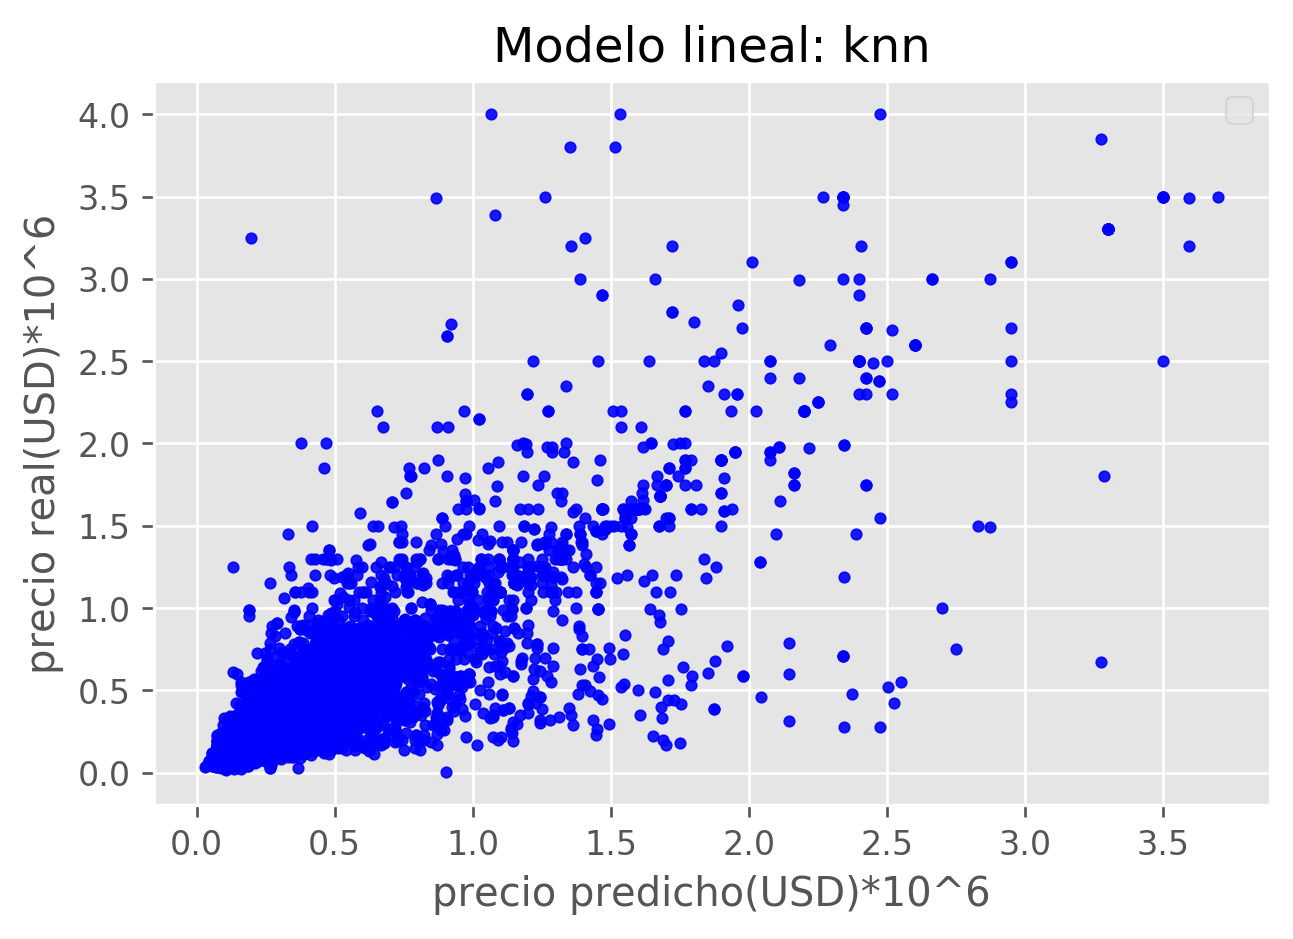

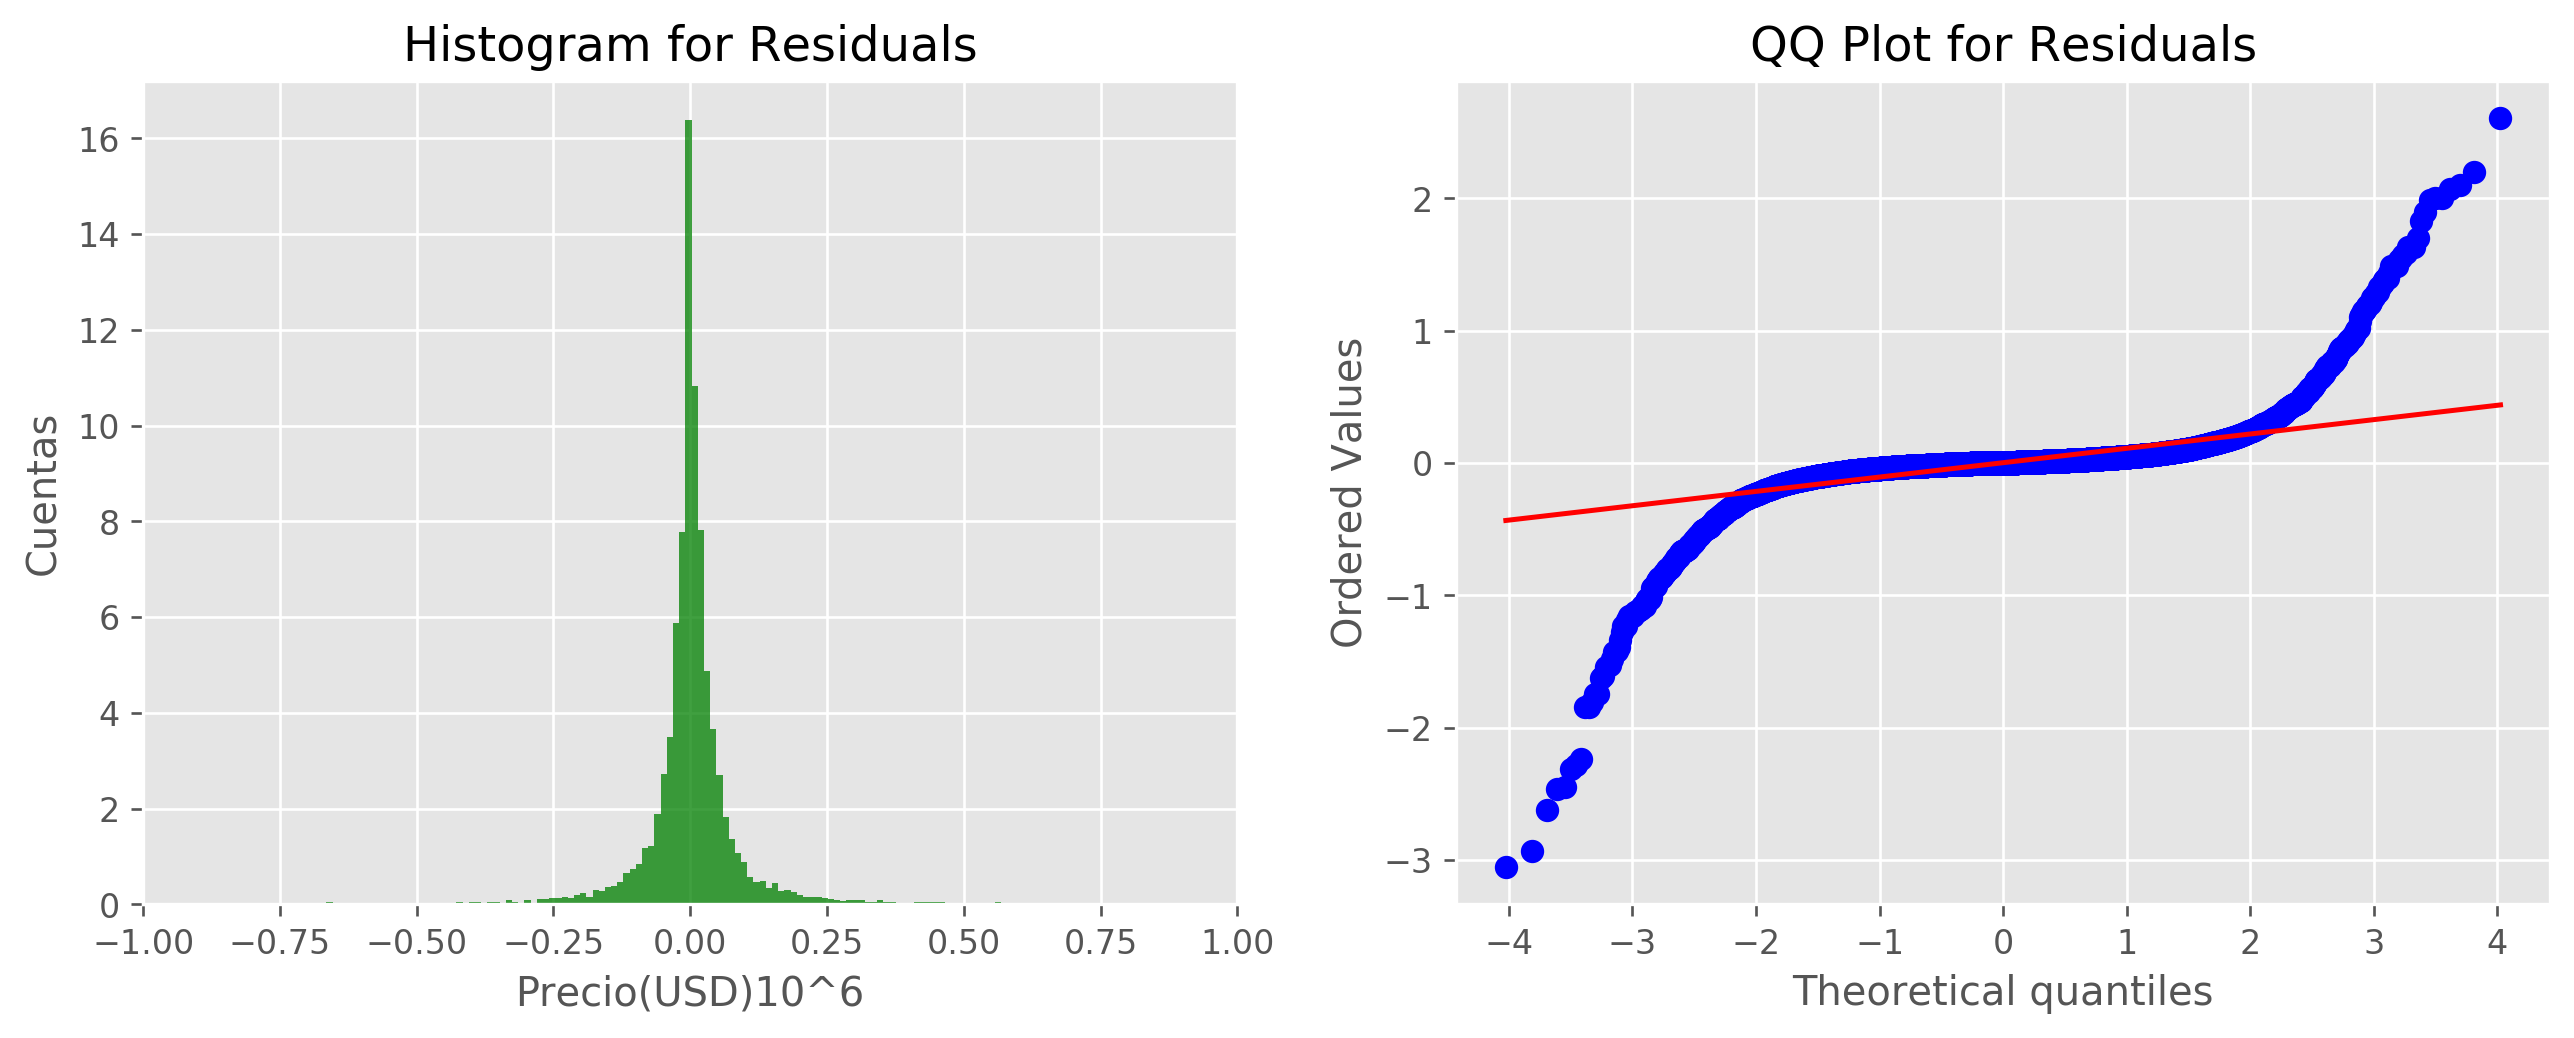

In [69]:
 knn_regresion_mejor(X_train, y_train, X_test, y_test,4)

Aúnque disminuimos los RMSE y aúmentamos $R^2$ con respecto al Benchmark de partida, aún seguimos teniendo un modelo con muy poca eficacia para la labor que deseamos: predecir el precio de un inmueble. Todo esto se debe en que no hemos aún realizado una transformación del dataset original para controlar los valores atípicos, pero lo realizaremos más adelante.. Sobre el comportamiento de residuos tenemos la misma conclusión que para el modelo de partida. 
Por el momento nuestro paso siguiente sera entrenar un arbol de decisión.

## Regresión por arboles de decisión

In [70]:
k_vals = list(range(1, 30))
rmse_test, rmse_train = curva_complejidad_regresion(X_train, y_train, X_test, y_test, k_vals, modelo='tree')

In [71]:
plt.figure(dpi=120)
plt.plot(k_vals, rmse_train, label='Entrenamiento')
plt.plot(k_vals, rmse_test, label='Test')
plt.legend()
plt.xticks()
plt.ylabel("RMSE")
_ = plt.xlabel("max_depth")
plt.arrow(10, 175000, 0, -1, head_width=1, head_length=10000, fc='k', ec='k')
plt.text(11, 165000, 'Punto de optimización')


Text(11, 165000, 'Punto de optimización')

Vemos que la profundidad de arbol que reduce el RMSE para los datos de entrenamiento y prueba se tienen con max_depth =10. Para profundidades mayores, el error en el conjunto de prueba se estabiliza. Con esto entrenaremos nuestro regresor con el hiperparamétro de max_depth =10 y verificaremos si 'mejoramos' en algo los resultados comparado con el modelo de Benchmark.

In [72]:
def tree_regresion_mejor(X_train, y_train, X_test, y_test,kk):
    '''X_train: arreglo de numpy de shape (n, m) con las características de entrenamiento
       y_train: arreglo de numpy de shape (n,) con las etiquetas de clase de entrenamiento
       X_test: arreglo de numpy de shape (n, m) con las características de prueba
       y_test: arreglo de numpy de shape (n,) con las etiquetas de prueba
       Solo imprime en pantalla el RMSE para el conjunto de entrenamiento, prueba y R**2'''
    tree = DecisionTreeRegressor(max_depth=kk)
    tree.fit(X_train, y_train)
    y_test_pred = tree.predict(X_test)
    y_train_pred = tree.predict(X_train)
    residuo = (y_test_pred-y_test)/10**6
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    
    plt.figure(dpi=120);
    plt.scatter(y_test_pred/10**6,y_test/10**6, s=10,alpha=0.9, color='g');
    plt.legend();
    plt.xticks();
    plt.title("Modelo lineal: Arbol");
    plt.ylabel("precio real(USD)*10^6");
    plt.xlabel("precio predicho(USD)*10^6");
    print(f'Raíz del error cuadrático medio en Train: {rmse_train:0.3f}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test:0.3f}')
    print(f'Coeficiente de Determinación por r2_score: {r2:0.3f}')
    
    plt.figure(dpi=120,figsize=(20,10))

    plt.subplot(2,3,1)

    plt.hist(residuo, bins = 500,density=True, facecolor='r', alpha=0.75)
    plt.title("Histogram for Residuals")
    plt.ylabel("Cuentas");
    plt.xlabel("Precio(USD)10^6");
    plt.xlim(-1,1)

    from scipy import stats


    plt.subplot(2,3,2)
    stats.probplot(x = residuo, dist = "norm", plot = plt)
    plt.title("QQ Plot for Residuals")
    plt.show()

    


No handles with labels found to put in legend.


Raíz del error cuadrático medio en Train: 119970.703
Raíz del error cuadrático medio en Test: 151225.133
Coeficiente de Determinación por r2_score: 0.743


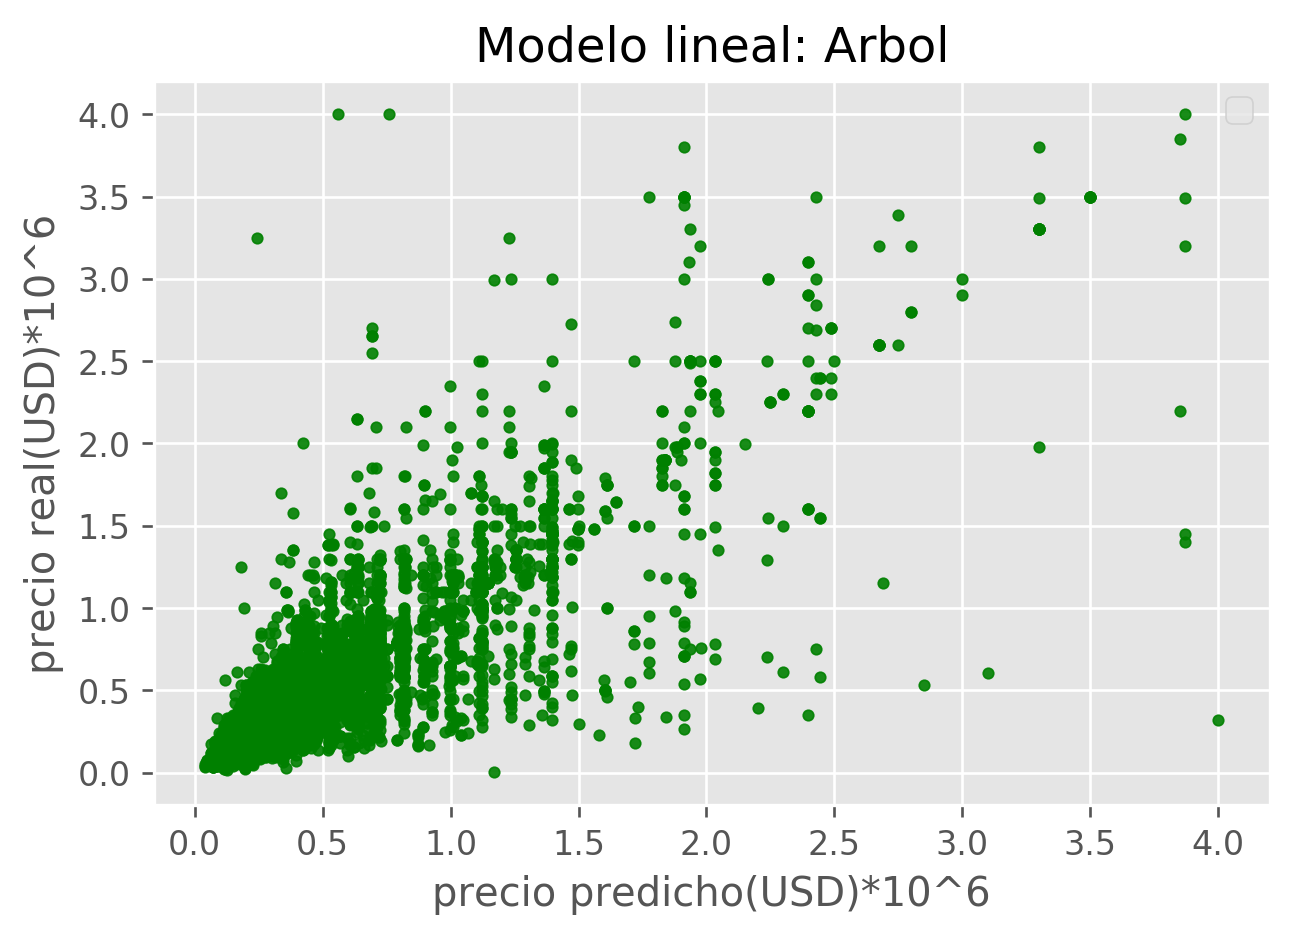

In [73]:
tree_regresion_mejor(X_train, y_train, X_test, y_test, 10)

Con arboles disminuimos los RMSE y aúmentamos $R^2$ con respecto al Benchmark de partida, pero los resultados son peores que los obtenidos por knn. Aún seguimos teniendo un modelo con muy poca eficacia para la labor que deseamos, predecir el precio de un inmueble. Todo esto se debe en que no hemos aún realizado una transformación del dataset original para controlar los valores atípicos. Pero lo realizaremos a continuación.

Algo también a mensionar es que para garantizar que nuestros modelos realmente ajustan bien se debe revisar el la **Heterocedasticidad** de cada modelo, es decir, debemos revisar que exista una varianza constante al rededor de los datos atípicos o en otras palabras de los residuos. Revisar la *Heterocedasticidad* nos da información sobre que transformación se debe realizar a los datos. 

En este punto al tener los dos 'mejores' modelos el que posee menor RMSE en el conjunt de evaluación es knn, por lo tanto. No hemos realizado ninguna transformación 'básica' sobre los datos de las que hemos aprendido en la primera sección de este trabajo, lo siguiente que haremos es transformar los datos (variables continuas) y ver si mejoramos nuestros modelos

<a id="s-14"></a>
# Transformación de variables y mejoramiento de los modelos de regresión

En lo que llevamos vemos que nuestros modelos de regresión tienen un mal desempeño según las métricas con los cuales estan siendo evaluandos (RMSE y $R^2$). Esto se debe en gran medida, a que dichas métricas son altamente sensibles a valores atípicos, es decir, aquellos valores que se encuentran muy distanciados del valor medio de una variable (valores que se encuentran varios $\sigma$ alejados del valor medio de una variable).

Esto fue lo que analizamos en la sección 1 de este proyecto. Y vimos que sin eliminar datos, podemos transformar las variables númericas continuas con una transformación lineal que permita 'acortar la distancia existente entre los valores más alejados de una distribución con su valor medio. Esta transformación puede ser el $\text{Ln}(X)$, donde $X$ representa una variable continua que toma valores mayores que cero.

Una vez transformados los datos, podemos trabajar con los modelos de regresión con las variables transformadas y al final aplicar una transformación inversa y ver los valores reales de la variable predicha.

En esta sección realizaremos una doble transformación. Sabemos que los modelos de regresión funcionan mejor cuando estan escalados, es decir, cuando todas las variables númericas estan en un mismo rango númerico, es por tal motivo que aprovecharemos de la libreria de *preprocessing*, la función *StandardScaler* con el objetivo de escalar los datos y mejorar el desempeño de nuestro modelo.

In [74]:
#Transformamos las variables continuas
continue_features = df[['surface_total','surface_covered','price']]
df_transf = np.log(continue_features)
discret_features =  df[['rooms','bedrooms','bathrooms']]
#constuimos el nuevo dataset con la transformación de las variables continuas, las discretas y las categoricas que teniamos antes
df_nw = pd.concat([discret_features,df_transf], axis =1)

X_l = df_nw.drop(['price'], axis=1)
y_l = df_nw['price']

In [75]:
X_l

rooms  bedrooms  bathrooms  surface_total  surface_covered
0         7.0       7.0        2.0       4.941642         4.941642
1         2.0       1.0        2.0       4.248495         4.060443
2         2.0       1.0        1.0       3.806662         3.806662
3         2.0       1.0        1.0       4.442651         3.912023
5         2.0       1.0        1.0       4.025352         4.025352
...       ...       ...        ...            ...              ...
146554    4.0       3.0        3.0       5.164786         4.709530
146555    3.0       2.0        2.0       4.969813         4.897840
146556    4.0       2.0        2.0       5.758902         4.962845
146557    3.0       2.0        2.0       4.976734         4.976734
146558    4.0       3.0        5.0       5.393628         5.347108

[81019 rows x 5 columns]

Este es nuestro dataset tranformando las variables continuas, pero dejando las variables discretas sin ningun cambio.
Te preguntaras, ¿por qué no transformar todas las variables?, La respuesta 'ingenua' es que un valor discreto y en un rango acotado (por ejemplo el número de habitaciones) no presenta problemas para nuestro análisis de regresión.

In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

def preprocesar(X):
    """
    Entrada:
      X: DataFrame con las características.
    Retorna:
        X_preprocessed es el conjunto de datos preprocesado
    """
    tf = ColumnTransformer([('scaler', StandardScaler(), X.select_dtypes(["float64"]).columns)])
    X_preprocessed = tf.fit_transform(X)
    print("ColumnTransformer usado para procesar el conjunto de datos: ", tf.named_transformers_.keys())
    return X_preprocessed

In [77]:
X_preprocessed_l = preprocesar(X_l)

ColumnTransformer usado para procesar el conjunto de datos:  dict_keys(['scaler'])


Importo libreria para realizar división del conjunto de datos a tratar, en conjunto de datos de entrenamiento y prueba, usaremos la convensión 70% entrenamiento, 30% prueba y usaremos el parametro *random_state=2020* para garantizar siempre la misma partición.

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_l, y_l, test_size=0.3, random_state=2020)

<a id="s-141"></a>
### Benchmark Transformado

No handles with labels found to put in legend.


Raíz del error cuadrático medio en Train: 0.342
Raíz del error cuadrático medio en Test: 0.338
Coeficiente de Determinación por r2_score: 0.748


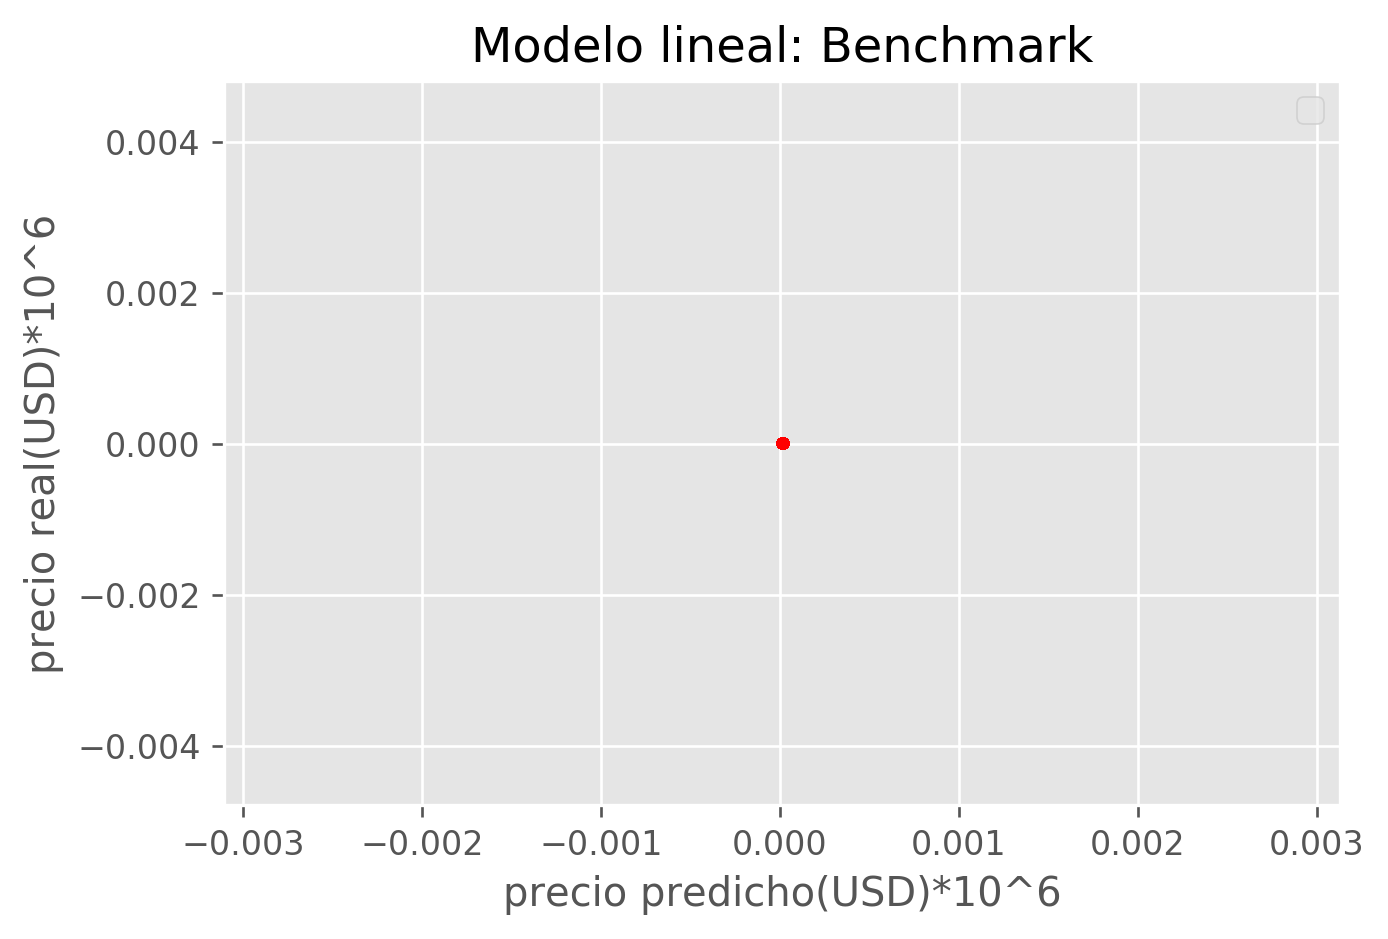

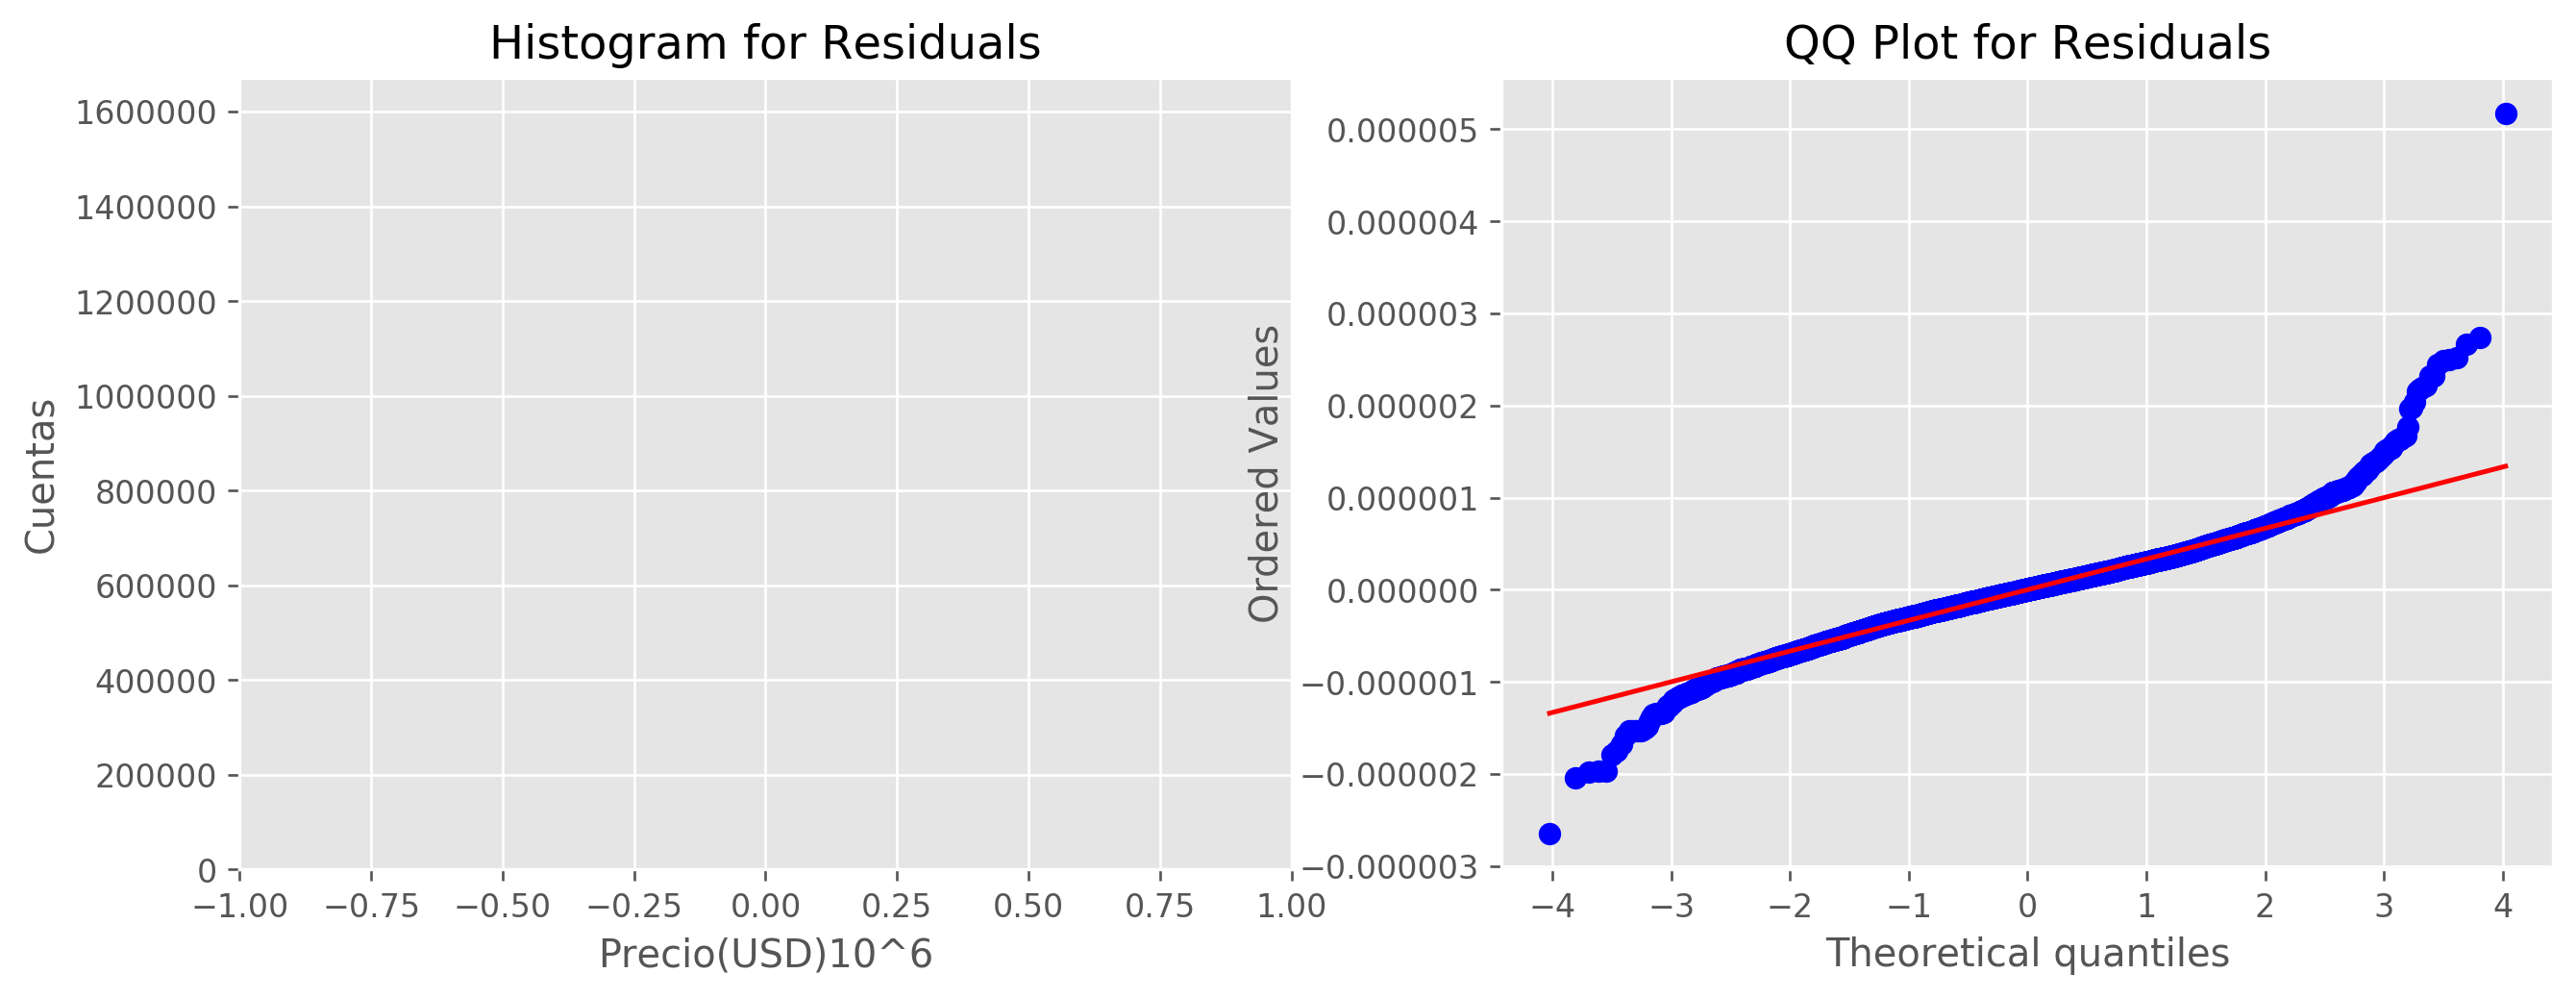

In [79]:
Benchmark(X_train, y_train, X_test, y_test)

Vemos una mejora abrumadora en nuestro modelo. Hemos podido hacer tender la RMSE cero, lo cual es lo que uno espera de un buen modelo de regresión, ahora $R^2$ tiende a 1, lo cual nos indica de igualmanera que el modelo ha mejorado.
En este caso no hay que asustarse de que los valores reales y predichos esten centrados en cero, esto se debe a que estamos trabajando con las variables transformadas. Aún no hemos realizado la transformación inversa. En los siguientes modelos si realizaremos la transformación inversa y veremos los cambios.

<a id="s-142"></a>
### Knn Transformado

In [80]:
k_vals = list(range(1, 30))
rmse_test, rmse_train = curva_complejidad_regresion(X_train, y_train, X_test, y_test, k_vals, modelo="knn")

In [81]:
plt.figure(dpi=120)
plt.plot(k_vals, rmse_train, label='Entrenamiento')
plt.plot(k_vals, rmse_test, label='Test')
plt.legend()
plt.xticks()
plt.ylabel("RMSE")
_ = plt.xlabel("número de vecinos")
plt.arrow(3, 0.275, 0, -0.01, head_width=0.5, head_length=0.005, fc='k', ec='k')
plt.text(5, 0.26, 'Punto de optimización')


Text(5, 0.26, 'Punto de optimización')

Vemos de igual forma una mejora abrumadora en el modelo, de igual modo mejora con respecto al Benchmark transformado

Entrenemos el modelo de knn con 3 vecinos

No handles with labels found to put in legend.


Raíz del error cuadrático medio en Train: 0.258
Raíz del error cuadrático medio en Test: 0.311
Coeficiente de Determinación por r2_score: 0.786


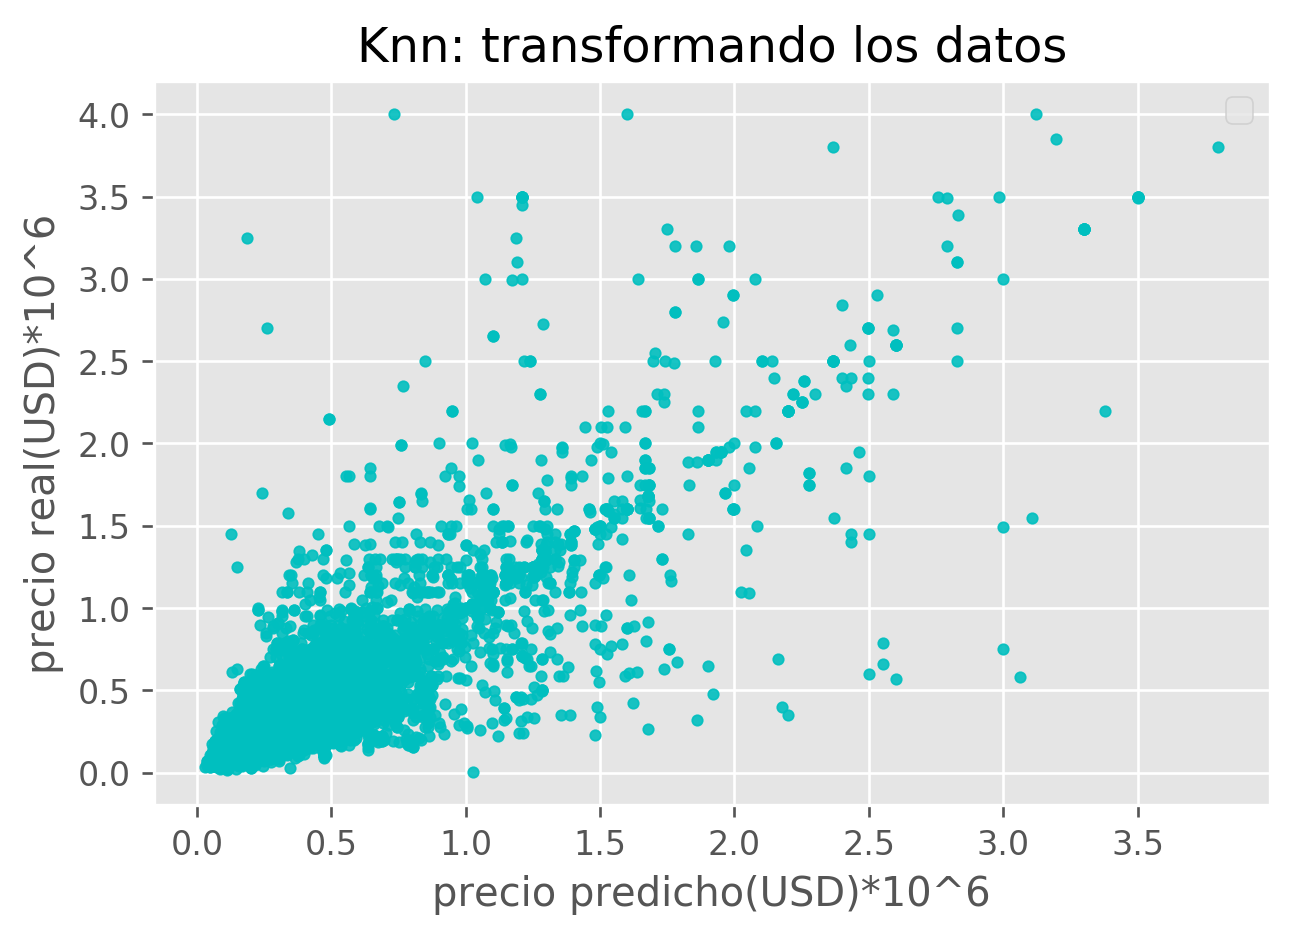

In [82]:
knn = KNeighborsRegressor(n_neighbors= 3)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)
plt.figure(dpi=120);
plt.scatter(np.exp(y_test_pred)/10**6,np.exp(y_test)/10**6, s=10,alpha=0.9, color='c');
plt.legend();
plt.xticks();
plt.title("Knn: transformando los datos");
plt.ylabel("precio real(USD)*10^6");
plt.xlabel("precio predicho(USD)*10^6");
print(f'Raíz del error cuadrático medio en Train: {rmse_train:0.3f}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test:0.3f}')
print(f'Coeficiente de Determinación por r2_score: {r2:0.3f}')
    


Como era de esperar nuestro modelo mejora (aqui los valores son los reales). Más adelante daremos conclusiones generales

<a id="s-143"></a>
### Arbol Transformado

In [83]:
k_vals = list(range(1, 30))
rmse_test, rmse_train = curva_complejidad_regresion(X_train, y_train, X_test, y_test, k_vals, modelo='tree')

Text(13, 0.32, 'Punto de optimización')

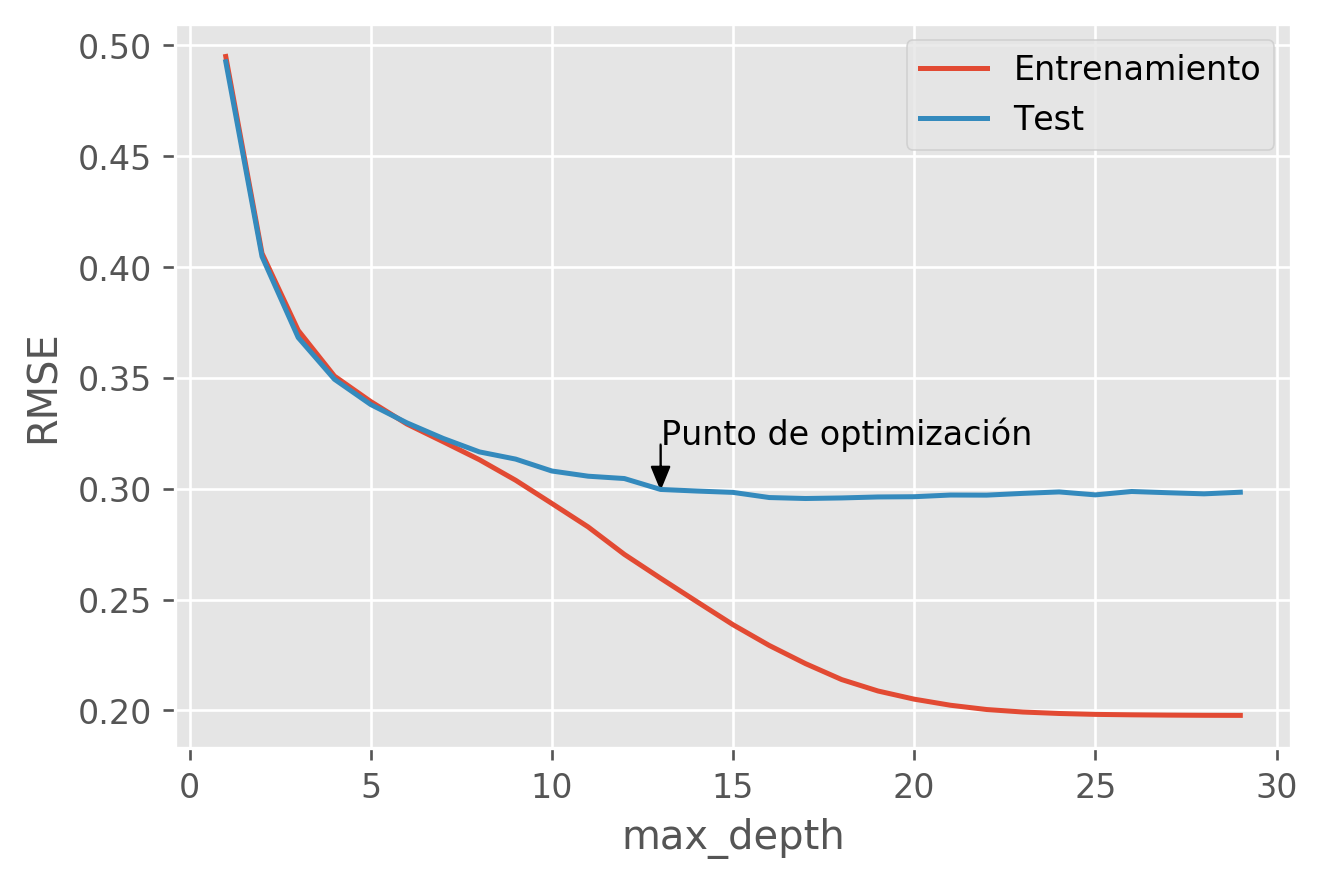

In [84]:
plt.figure(dpi=120)
plt.plot(k_vals, rmse_train, label='Entrenamiento')
plt.plot(k_vals, rmse_test, label='Test')
plt.legend()
plt.xticks()
plt.ylabel("RMSE")
_ = plt.xlabel("max_depth")
plt.arrow(13, 0.32, 0, -0.01, head_width=0.5, head_length=0.01, fc='k', ec='k')
plt.text(13, 0.32, 'Punto de optimización')


Vemos de igual forma una mejora en el modelo, su desempeño es similar al regresor de knn, ahora procedemos a entrenar el arbol con el mejor hiperparametro max_depth=11

In [85]:
tree = DecisionTreeRegressor(max_depth=11)
tree.fit(X_train, y_train)
y_test_pred = tree.predict(X_test)
y_train_pred = tree.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)
plt.figure(dpi=120);
residuo = (np.exp(y_test_pred)-np.exp(y_test))/10**6
plt.scatter(np.exp(y_test_pred)/10**6,np.exp(y_test)/10**6, s=10,alpha=0.9, color='y');
plt.legend();
plt.xticks();
plt.title("Arbol: transformando los datos");
plt.ylabel("precio real(USD)*10^6");
plt.xlabel("precio predicho(USD)*10^6");
print(f'Raíz del error cuadrático medio en Train: {rmse_train:0.3f}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test:0.3f}')
print(f'Coeficiente de Determinación por r2_score: {r2:0.3f}')



plt.figure(dpi=120,figsize=(20,10))

plt.subplot(2,3,1)

plt.hist(residuo, bins = 500,density=True, facecolor='g', alpha=0.75)
plt.title("Histogram for Residuals")
plt.ylabel("Cuentas");
plt.xlabel("Precio(USD)10^6");
plt.xlim(-1,1)

from scipy import stats


plt.subplot(2,3,2)
stats.probplot(x = residuo, dist = "norm", plot = plt)
plt.title("QQ Plot for Residuals")
plt.show()


No handles with labels found to put in legend.


Raíz del error cuadrático medio en Train: 0.283
Raíz del error cuadrático medio en Test: 0.306
Coeficiente de Determinación por r2_score: 0.793


<a id="s-15"></a>
# Conclusiones
En este punto vemos que tanto los modelos de regresión por knn y arboles han mejorado su desempeño con solo transformar los datos, aún así todavia podemos realizar algunas mejoras y así responder con mejores argumentos cual es el mejor modelo para la tarea de predición del precio de un inmueble. En el transcurso de este trabajo hemos visto la necesidad de un buen critero para abordar el valores atípicos, pues estos se ven reflejados en el rendimiento de nuestros modelos. La grafica QQ plot así no lo indica.

Por otro lado no hemos analizado multicolinealidad, algo que puede mejor nuestros modelos, de igualmanera no hemos realizado un análisis sobre Heterocedasticidad que nos permita inferir una mejor función para transformar los datos, tampoco hemos análizado $R^2_adjuted$ que nos da mejor información en sistemas multivariables.
Realizar esto, y adicionar la informacion de las variables categoricas (luego transformarlas con onehot encoder)  permitirá mejorar los modelos. Igualmente, usar PCA para encontrar los direcciones normales 'vectores propios' en donde nuestro conjunto de datos es diagonal nos optimizará nuestro modelo.

### En modelo de Machine learning constrido hasta el momento se puede mejorar, y será parte de una segunda versión, donde se usaran métodos avanzados como lo son Random Forest o xgboost. También usaremos métodos como PCA para crear visualizaciones completas del conjunto de datos pero por grupos.